# **Exploratory Data Analysis**

objective:

*   perform basic data cleaning and initial EDA in order to understand the structure of the data, the distribution of features, and potential relationships, laying the groundwork for modeling or more in-depth analysis

*   select those most relevant for predicting customer churn and document the selection criteria and rationale for choosing each data set, ensuring that the data will provide meaningful insights into customer behaviour

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load all sheets from Excel
file_path = "Customer_Churn_Data_Large.xlsx"
demographics = pd.read_excel(file_path, sheet_name="Customer_Demographics")
transactions = pd.read_excel(file_path, sheet_name="Transaction_History")
service = pd.read_excel(file_path, sheet_name="Customer_Service")
online = pd.read_excel(file_path, sheet_name="Online_Activity")
churn = pd.read_excel(file_path, sheet_name="Churn_Status")

# 1.Initial EDA

## 1.1 Initial EDA on Customer Demographics

In [3]:
# Gather basic information and descriptive statistics about the data
demographics.info()
demographics.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
count,1000.000000,1000.000000,1000,1000,1000
unique,NaN,NaN,2,4,3
top,NaN,NaN,F,Widowed,High
freq,NaN,NaN,513,276,349
mean,500.500000,43.267000,NaN,NaN,NaN
std,288.819436,15.242311,NaN,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN
25%,250.750000,30.000000,NaN,NaN,NaN
50%,500.500000,43.000000,NaN,NaN,NaN
75%,750.250000,56.000000,NaN,NaN,NaN


In [4]:
# Check for duplicates
demographics.duplicated().sum()

np.int64(0)

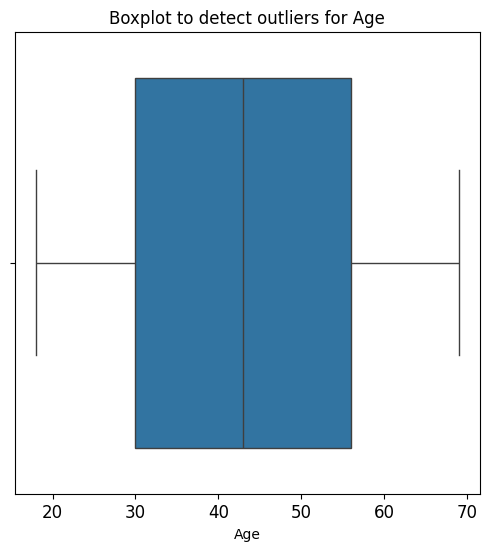

In [5]:
# check outliers
# Create a boxplot to visualize distribution of `age` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for Age', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=demographics['Age'])
plt.show()

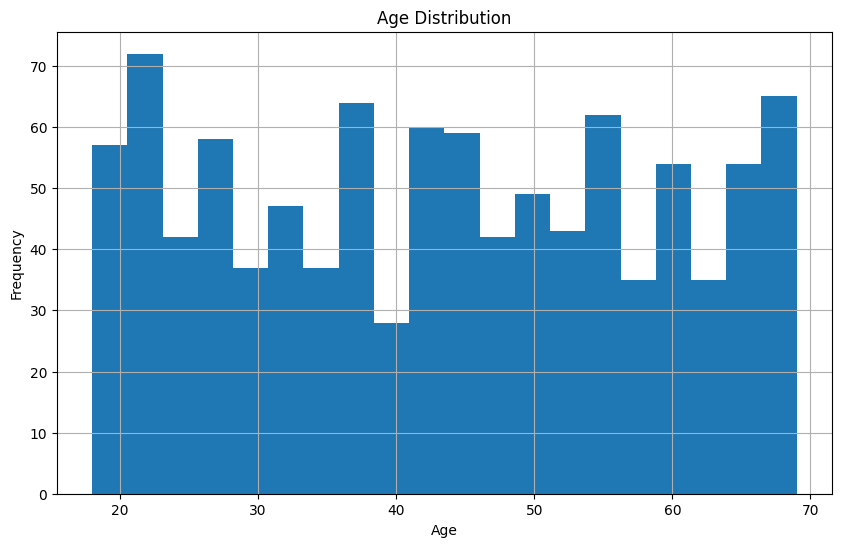

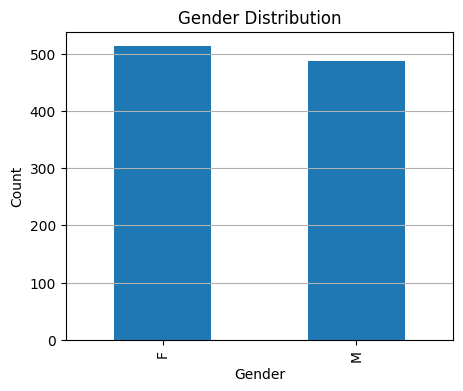

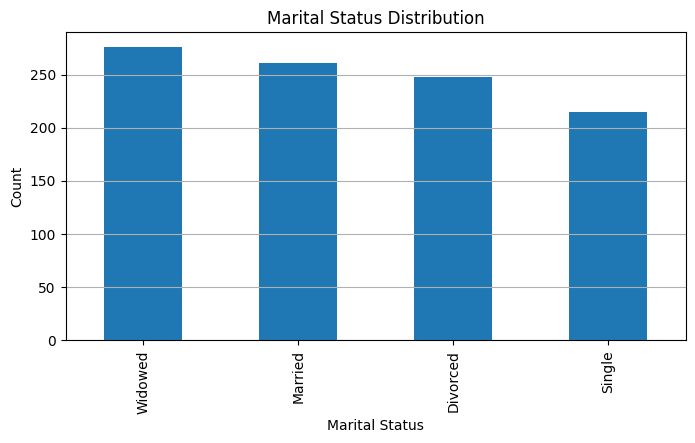

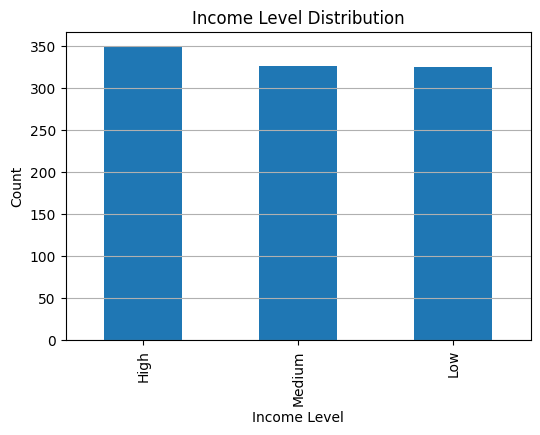

In [6]:
# Histogram of Age Distribution
# Shows the overall distribution of customer ages to identify concentration in specific age groups
plt.figure(figsize=(10, 6))
plt.hist(demographics['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bar Chart of Gender Distribution
# Displays the count of male vs. female customers
plt.figure(figsize=(5, 4))
demographics['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Bar Chart of Marital Status Distribution
# Helps understand the marital composition of the customer base
plt.figure(figsize=(8, 4))
demographics['MaritalStatus'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Bar Chart of Income Level Distribution
# Analyzes how customers are distributed across income levels
plt.figure(figsize=(6, 4))
demographics['IncomeLevel'].value_counts().plot(kind='bar')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# 1.2 Initial EDA on Transaction History

In [7]:
# Gather basic information and descriptive statistics about the data
transactions.info()
transactions.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       5054 non-null   int64         
 1   TransactionID    5054 non-null   int64         
 2   TransactionDate  5054 non-null   datetime64[ns]
 3   AmountSpent      5054 non-null   float64       
 4   ProductCategory  5054 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 197.6+ KB


,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
count,5054.000000,5054.000000,5054,5054.000000,5054
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Books
freq,NaN,NaN,NaN,NaN,1041
mean,501.424218,5510.538979,2022-07-01 19:25:37.158686208,250.707351,NaN
min,1.000000,1000.000000,2022-01-01 00:00:00,5.180000,NaN
25%,251.000000,3242.000000,2022-04-03 00:00:00,127.105000,NaN
50%,506.000000,5530.000000,2022-07-01 00:00:00,250.525000,NaN
75%,749.000000,7680.750000,2022-09-29 00:00:00,373.412500,NaN
max,1000.000000,9997.000000,2022-12-31 00:00:00,499.860000,NaN


In [8]:
# Check for duplicates
transactions.duplicated().sum()

np.int64(0)

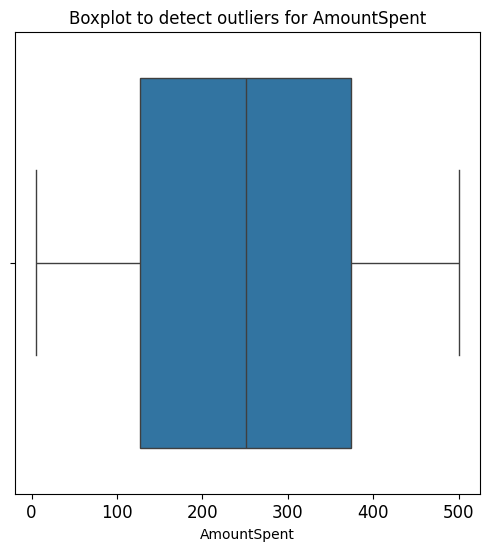

In [9]:
# check outliers
# Create a boxplot to visualize distribution of `AmountSpent` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for AmountSpent', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=transactions['AmountSpent'])
plt.show()

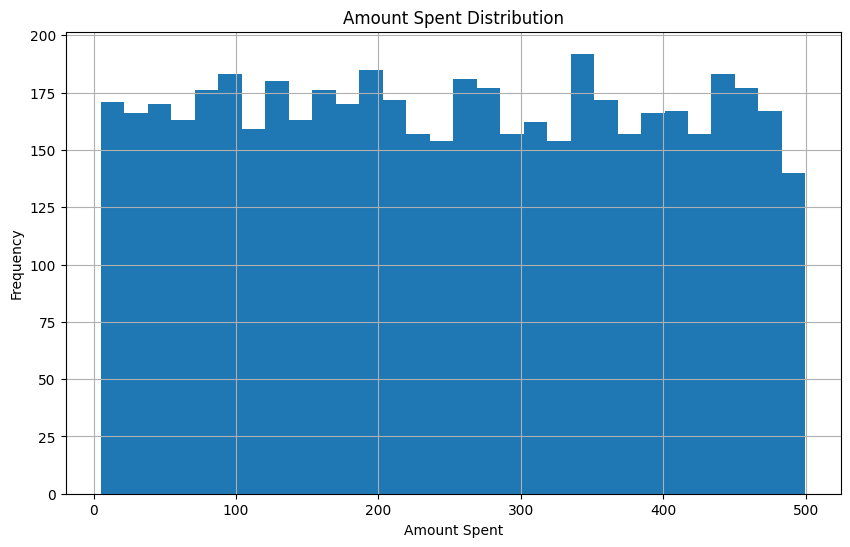

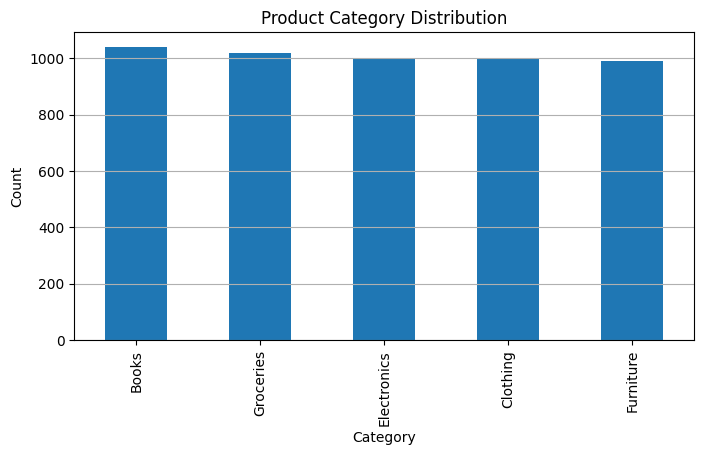

In [10]:
# Histogram of Amount Spent per Transaction
# It helps identify the typical spending range and detect any unusually high or low spending behavior.
plt.figure(figsize=(10, 6))
plt.hist(transactions['AmountSpent'], bins=30)
plt.title('Amount Spent Distribution')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bar Chart of Product Category Frequency
# It helps understand which types of products are most commonly purchased
plt.figure(figsize=(8, 4))
transactions['ProductCategory'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# 1.3 Initial EDA on Customer Service

In [11]:
# Gather basic information and descriptive statistics about the data
service.info()
service.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1002 non-null   int64         
 1   InteractionID     1002 non-null   int64         
 2   InteractionDate   1002 non-null   datetime64[ns]
 3   InteractionType   1002 non-null   object        
 4   ResolutionStatus  1002 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 39.3+ KB


,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
count,1002.000000,1002.000000,1002,1002,1002
unique,NaN,NaN,NaN,3,2
top,NaN,NaN,NaN,Feedback,Resolved
freq,NaN,NaN,NaN,360,523
mean,485.209581,5952.887226,2022-07-02 19:28:22.994011904,NaN,NaN
min,1.000000,2015.000000,2022-01-01 00:00:00,NaN,NaN
25%,238.250000,3991.500000,2022-04-07 00:00:00,NaN,NaN
50%,474.500000,5911.500000,2022-07-02 12:00:00,NaN,NaN
75%,735.750000,7908.250000,2022-09-30 00:00:00,NaN,NaN
max,995.000000,9997.000000,2022-12-30 00:00:00,NaN,NaN


In [12]:
# Check for duplicates
service.duplicated().sum()

np.int64(0)

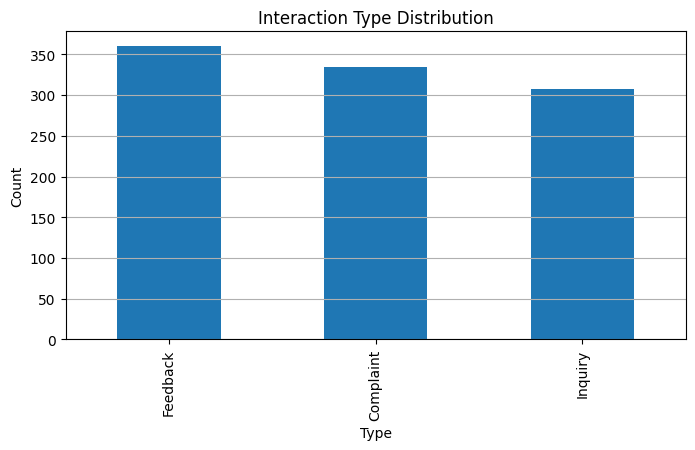

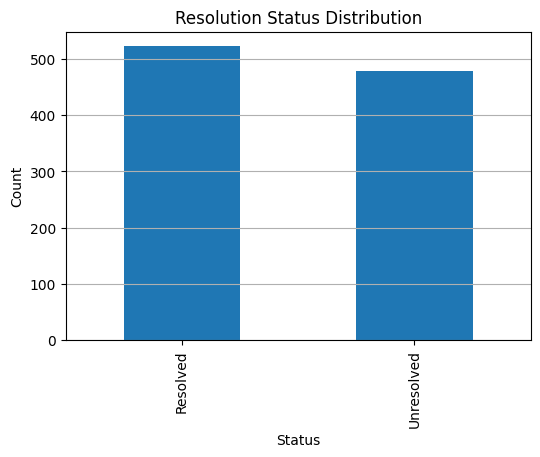

In [13]:
# Bar Chart of Interaction Types
# This chart shows how frequently each type of customer service interaction occurred,such as inquiries, complaints, or support requests.
plt.figure(figsize=(8, 4))
service['InteractionType'].value_counts().plot(kind='bar')
plt.title('Interaction Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Bar Chart of Resolution Status
# It helps evaluate customer service effectiveness and resolution success rate
plt.figure(figsize=(6, 4))
service['ResolutionStatus'].value_counts().plot(kind='bar')
plt.title('Resolution Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# 1.4 Initial EDA on Online Activity

In [14]:
# Gather basic information and descriptive statistics about the data
online.info()
online.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
count,1000.000000,1000,1000.000000,1000
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,Online Banking
freq,NaN,NaN,NaN,349
mean,500.500000,2023-07-05 21:28:48,25.912000,NaN
min,1.000000,2023-01-01 00:00:00,1.000000,NaN
25%,250.750000,2023-04-08 00:00:00,13.750000,NaN
50%,500.500000,2023-07-10 12:00:00,27.000000,NaN
75%,750.250000,2023-10-01 06:00:00,38.000000,NaN
max,1000.000000,2023-12-31 00:00:00,49.000000,NaN


In [15]:
# Check for duplicates
service.duplicated().sum()

np.int64(0)

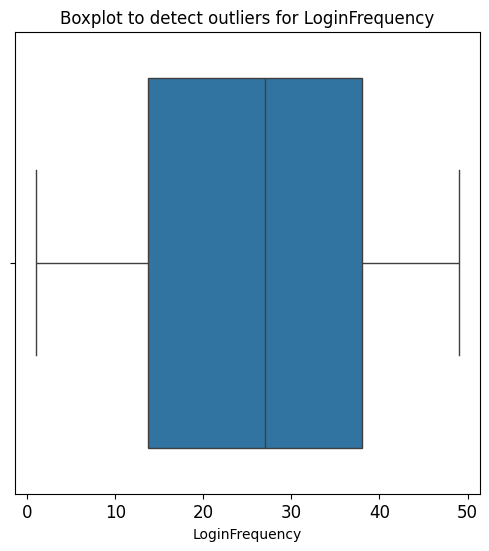

In [16]:
# check outliers
# Create a boxplot to visualize distribution of `LoginFrequency` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for LoginFrequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=online['LoginFrequency'])
plt.show()

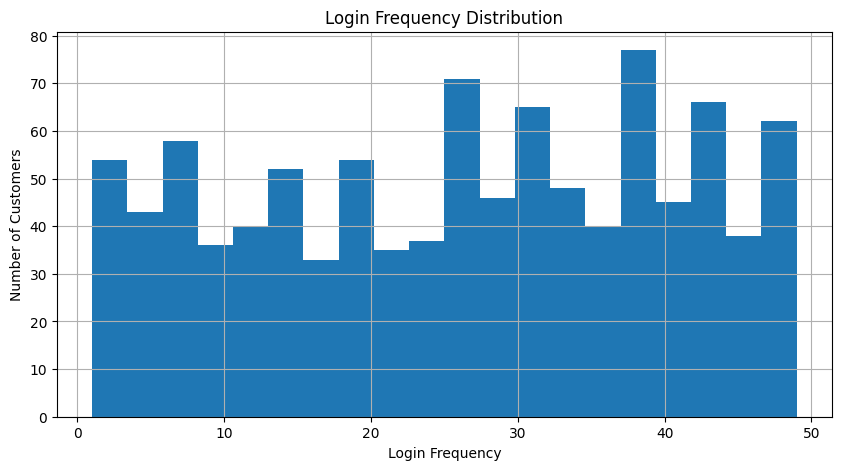

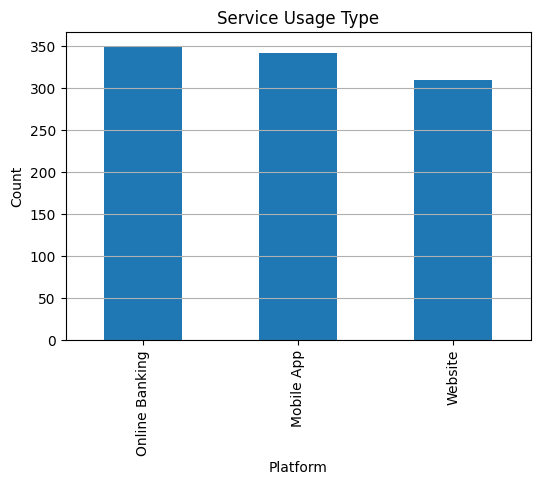

In [17]:
# Histogram of Login Frequency
# It helps identify usage patterns, such as highly active vs. inactive users
plt.figure(figsize=(10, 5))
online['LoginFrequency'].hist(bins=20)
plt.title('Login Frequency Distribution')
plt.xlabel('Login Frequency')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# Bar Chart of Service Usage Types
# This chart shows which platforms customers use to access services (e.g., Website, Mobile App).
plt.figure(figsize=(6, 4))
online['ServiceUsage'].value_counts().plot(kind='bar')
plt.title('Service Usage Type')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# 1.5 Initial EDA on Churn Status

In [18]:
online.info()
online.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   LastLoginDate   1000 non-null   datetime64[ns]
 2   LoginFrequency  1000 non-null   int64         
 3   ServiceUsage    1000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB


,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
count,1000.000000,1000,1000.000000,1000
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,Online Banking
freq,NaN,NaN,NaN,349
mean,500.500000,2023-07-05 21:28:48,25.912000,NaN
min,1.000000,2023-01-01 00:00:00,1.000000,NaN
25%,250.750000,2023-04-08 00:00:00,13.750000,NaN
50%,500.500000,2023-07-10 12:00:00,27.000000,NaN
75%,750.250000,2023-10-01 06:00:00,38.000000,NaN
max,1000.000000,2023-12-31 00:00:00,49.000000,NaN


In [19]:
# Check for duplicates
service.duplicated().sum()

np.int64(0)

# 1.6 Data Aggregation and Merging

In [20]:
# Aggregate transaction data
tx_agg = transactions.groupby("CustomerID").agg({
    "AmountSpent": ["sum", "mean", "count"],
    "ProductCategory": "nunique"
}).reset_index()
tx_agg.columns = ["CustomerID", "TotalSpent", "AvgSpent", "TransactionCount", "UniqueCategories"]

# Merge all datasets
master = demographics.merge(tx_agg, on="CustomerID", how="left") \
                     .merge(service, on="CustomerID", how="left") \
                     .merge(online, on="CustomerID", how="left") \
                     .merge(churn, on="CustomerID", how="left")
master.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalSpent,AvgSpent,TransactionCount,UniqueCategories,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,416.50,416.500,1,1,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,1547.42,221.060,7,4,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,3,18,M,Single,Low,1702.98,283.830,6,4,9976.0,2022-08-24,Inquiry,Resolved,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,917.29,183.458,5,4,7354.0,2022-11-18,Inquiry,Resolved,2023-08-25,2,Website,0
4,4,21,M,Widowed,Low,917.29,183.458,5,4,5393.0,2022-07-03,Inquiry,Unresolved,2023-08-25,2,Website,0


In [21]:
master.info()
master.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1334 non-null   int64         
 1   Age               1334 non-null   int64         
 2   Gender            1334 non-null   object        
 3   MaritalStatus     1334 non-null   object        
 4   IncomeLevel       1334 non-null   object        
 5   TotalSpent        1334 non-null   float64       
 6   AvgSpent          1334 non-null   float64       
 7   TransactionCount  1334 non-null   int64         
 8   UniqueCategories  1334 non-null   int64         
 9   InteractionID     1002 non-null   float64       
 10  InteractionDate   1002 non-null   datetime64[ns]
 11  InteractionType   1002 non-null   object        
 12  ResolutionStatus  1002 non-null   object        
 13  LastLoginDate     1334 non-null   datetime64[ns]
 14  LoginFrequency    1334 n

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TotalSpent,AvgSpent,TransactionCount,UniqueCategories,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
count,1334.000000,1334.000000,1334,1334,1334,1334.000000,1334.000000,1334.000000,1334.000000,1002.000000,1002,1002,1002,1334,1334.000000,1334,1334.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,3,NaN
top,NaN,NaN,F,Widowed,High,NaN,NaN,NaN,NaN,NaN,NaN,Feedback,Resolved,NaN,NaN,Online Banking,NaN
freq,NaN,NaN,696,359,461,NaN,NaN,NaN,NaN,NaN,NaN,360,523,NaN,NaN,467,NaN
mean,495.011244,43.209145,NaN,NaN,NaN,1284.886829,249.030211,5.106447,3.117691,5952.887226,2022-07-02 19:28:22.994012160,NaN,NaN,2023-07-05 01:45:47.226386688,25.766117,NaN,0.200150
min,1.000000,18.000000,NaN,NaN,NaN,9.800000,9.800000,1.000000,1.000000,2015.000000,2022-01-01 00:00:00,NaN,NaN,2023-01-01 00:00:00,1.000000,NaN,0.000000
25%,243.250000,30.000000,NaN,NaN,NaN,654.557500,204.681458,3.000000,2.000000,3991.500000,2022-04-07 00:00:00,NaN,NaN,2023-04-08 00:00:00,13.250000,NaN,0.000000
50%,490.000000,43.000000,NaN,NaN,NaN,1255.380000,250.878833,5.000000,3.000000,5911.500000,2022-07-02 12:00:00,NaN,NaN,2023-07-10 00:00:00,27.000000,NaN,0.000000
75%,746.750000,56.000000,NaN,NaN,NaN,1827.730000,294.708333,7.000000,4.000000,7908.250000,2022-09-30 00:00:00,NaN,NaN,2023-09-26 00:00:00,38.000000,NaN,0.000000
max,1000.000000,69.000000,NaN,NaN,NaN,3386.040000,496.990000,9.000000,5.000000,9997.000000,2022-12-30 00:00:00,NaN,NaN,2023-12-31 00:00:00,49.000000,NaN,1.000000


# 2.Deep EDA

**Objective:**


*   Use statistical techniques and data visualisation tools to explore the data sets. Create visualisations such as histograms, scatter plots, and box plots to understand distributions, trends, and relationships between variables.

*   Identify key features that may influence customer churn, paying special attention to patterns or anomalies that could be significant.



**Key Questions:**
- What types of customers are more likely to churn?
- How do transaction behavior and service experiences affect churn?
- Can online activity patterns help detect churn risk early?



In this step, I explore customer characteristics and behaviors to uncover factors related to churn.
I divide the analysis into four layers:

1. Churn Overview

  1.1 Overall Distribution

  1.2 Customer Demographics vs. Churn

2. Key Driver Analysis

  2.1 Transaction Behavior vs. Churn

  2.2 Service Experience vs. Churn

  2.3 Online Behavior vs. Churn

3. Multivariate Analysis

  3.1 Feature Correlation
  
  3.2 Pairwise Interaction

  3.3 Customer Segmentation

# 2.1 Churn Overview

### 2.1.1 Basic Customer Profiles

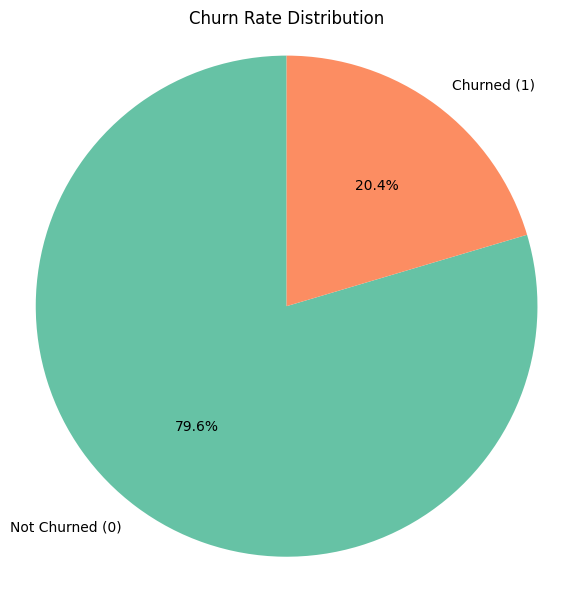

In [22]:
# The general distribution of churn rate
churn_rate = churn['ChurnStatus'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(
    churn_rate,
    labels=['Not Churned (0)', 'Churned (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62']
)
plt.title('Churn Rate Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

Approximately 80% of customers have not churned, while around 20% have already churned.

### 2.1.2 Customer Demographics vs. Churn

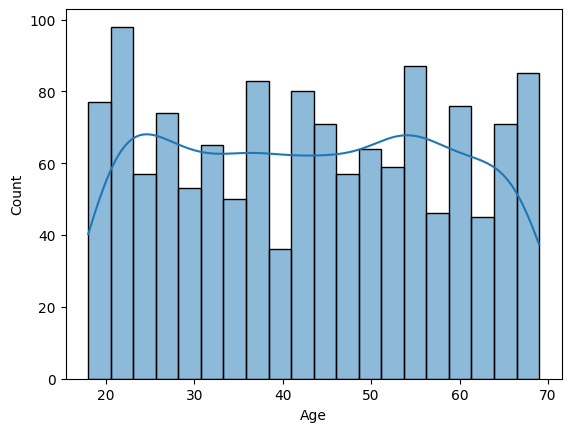

In [23]:
# The histogram of the age
sns.histplot(master['Age'], bins=20, kde=True)
plt.grid(False)
plt.show()

**Observation:**

1.The age distribution is bimodal.The first peak occurs between ages 25–35, and the second peak appears around 55–65.

2.The data is relatively dispersed and not normally distributed.

5.The median age is approximately 40, and the distribution is asymmetric.

<ipython-input-24-d3fb94e0e492>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_group = master.groupby('AgeGroup_Custom')['ChurnStatus'].mean().reset_index()
<ipython-input-24-d3fb94e0e492>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup_Custom', y='ChurnStatus', data=churn_by_group, palette=custom_colors)


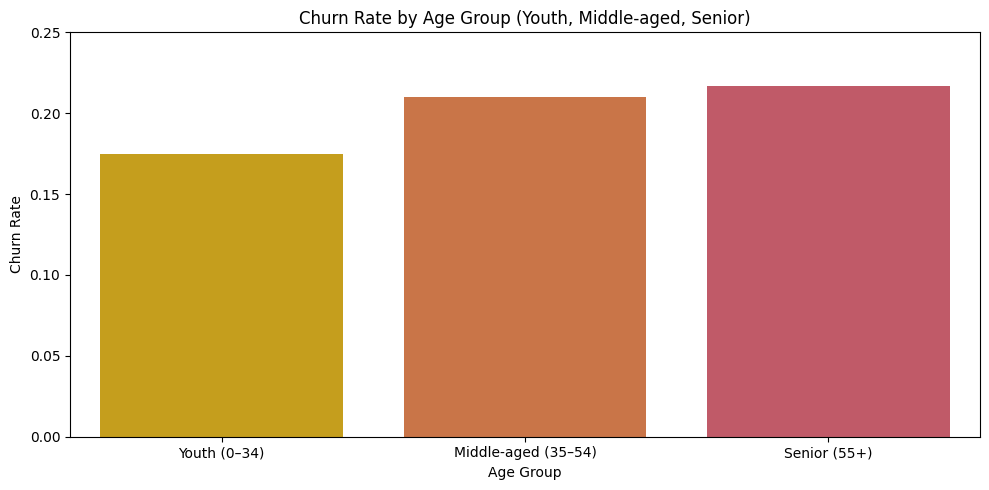

In [24]:
bins = [0, 35, 55, 100]
labels = ['Youth (0–34)', 'Middle-aged (35–54)', 'Senior (55+)']
master['AgeGroup_Custom'] = pd.cut(master['Age'], bins=bins, labels=labels, right=False)

churn_by_group = master.groupby('AgeGroup_Custom')['ChurnStatus'].mean().reset_index()

custom_colors = ['#E1AD01', '#DE6E32', '#D1495B']

plt.figure(figsize=(10, 5))
sns.barplot(x='AgeGroup_Custom', y='ChurnStatus', data=churn_by_group, palette=custom_colors)

plt.title("Churn Rate by Age Group (Youth, Middle-aged, Senior)")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.ylim(0, 0.25)
plt.tight_layout()
plt.show()


1.**The Youth group (0–34) has the lowest churn rate, at approximately 17.5%. The Senior group (55+) has a slightly higher churn rate than the Middle-aged group (35–54), reaching nearly 22%.**

2.Younger customers tend to have greater platform acceptance, are more tech-savvy, and show stronger retention willingness.

3.In contrast,**senior customers are most prone to churn**,possibly due to difficulty navigating the interface, misaligned services, or lower usage frequency.

<ipython-input-25-b4f3b8d79281>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='ChurnRate', data=churn_by_gender, palette='Set2')


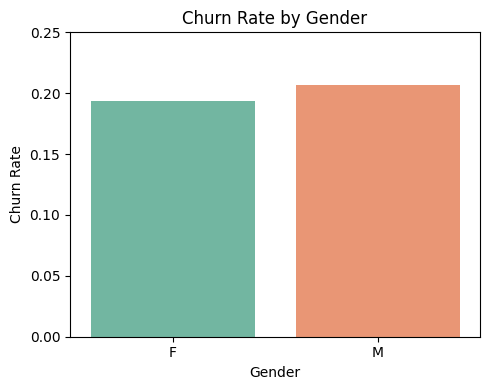

In [25]:
# Gender distribution by churn status
churn_by_gender = master.groupby('Gender')['ChurnStatus'].mean().reset_index()
churn_by_gender.columns = ['Gender', 'ChurnRate']

plt.figure(figsize=(5, 4))
sns.barplot(x='Gender', y='ChurnRate', data=churn_by_gender, palette='Set2')

plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.ylim(0, 0.25)
plt.tight_layout()
plt.show()


Churn rate is approximately equal across genders.Gender may contribute weakly to churn prediction.

<ipython-input-26-8da7a78b6bf0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MaritalStatus', y='ChurnRate', data=churn_by_marital, palette=colors)


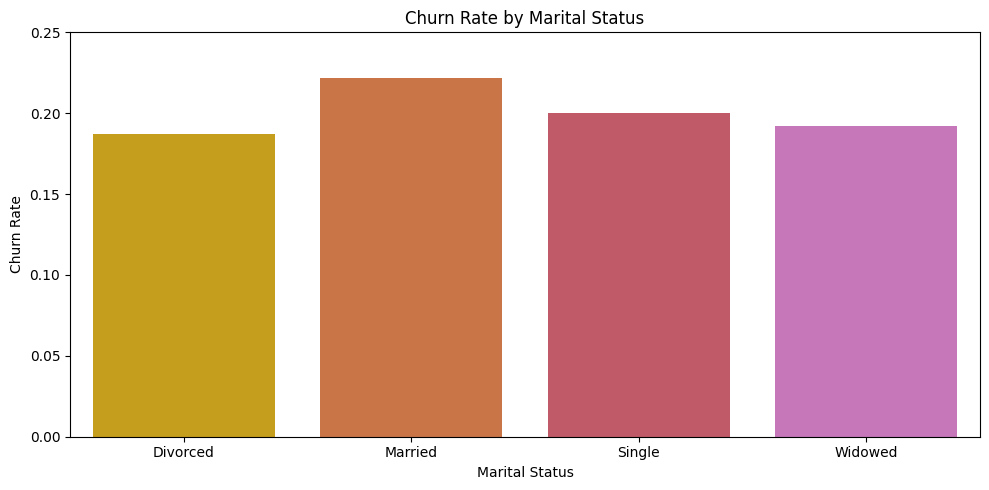

In [26]:
# Marital Status by Churn Rate
churn_by_marital = master.groupby('MaritalStatus')['ChurnStatus'].mean().reset_index()
churn_by_marital.columns = ['MaritalStatus', 'ChurnRate']

colors = ['#E1AD01', '#DE6E32', '#D1495B', '#D36AC2']

plt.figure(figsize=(10, 5))
sns.barplot(x='MaritalStatus', y='ChurnRate', data=churn_by_marital, palette=colors)

plt.title("Churn Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Churn Rate")
plt.ylim(0, 0.25)
plt.tight_layout()
plt.show()

**Married group have the highest churn rate(about 22%)**.Although marital status cannot independently explain churn behavior, it can serve as an indicator of a customer's life situation.

<ipython-input-27-24d0c4390e50>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Level', y='Churn Rate', data=churn_by_income_level, palette=colors)


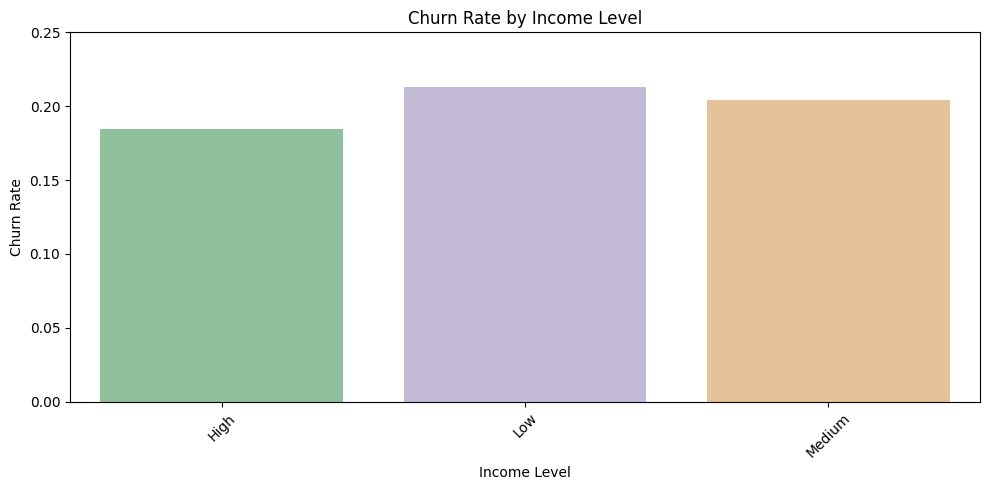

In [27]:
# Income Level by Churn Rate
churn_by_income_level = master.groupby('IncomeLevel')['ChurnStatus'].mean().reset_index()
churn_by_income_level.columns = ['Income Level', 'Churn Rate']

colors = ['#88c999', '#c1b6d9', '#f0c38e']  # Green, Light Purple, Beige

plt.figure(figsize=(10, 5))
sns.barplot(x='Income Level', y='Churn Rate', data=churn_by_income_level, palette=colors)

plt.title("Churn Rate by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Churn Rate")
plt.ylim(0,0.25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


High-income customers appear to have the lowest churn rate (below 20%), **but a customer's income ≠ actual value**.
Only when income is analyzed in conjunction with spending behavior can we truly understand the structural differences in customer loyalty and risk.
Therefore, **a combined analysis of Income × Spending Level vs. Churn Rate is necessary.**

# 2.2 Key Driver Analysis

### 2.2.1 Transaction Behavior vs. Churn

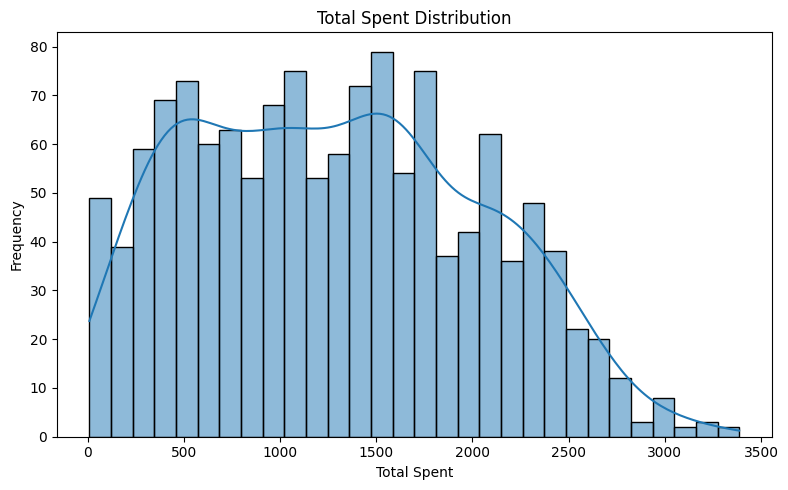

In [28]:
# Total Spent Distribution
plt.figure(figsize=(8, 5))
sns.histplot(master['TotalSpent'], bins=30, kde=True)
plt.title('Total Spent Distribution')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

1.**The distribution is clearly right-skewed**, indicating that the mean is pulled up by high spenders, while the median is much lower.A few extremely high-spending customers stand out, with amounts far above the average.

2.**Churn among high-value customers could severely impact the business**, and they should be prioritized for retention efforts.

<ipython-input-29-a61a3c2b8ea9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=master, x='ChurnStatus', y='TotalSpent', palette='Set2')


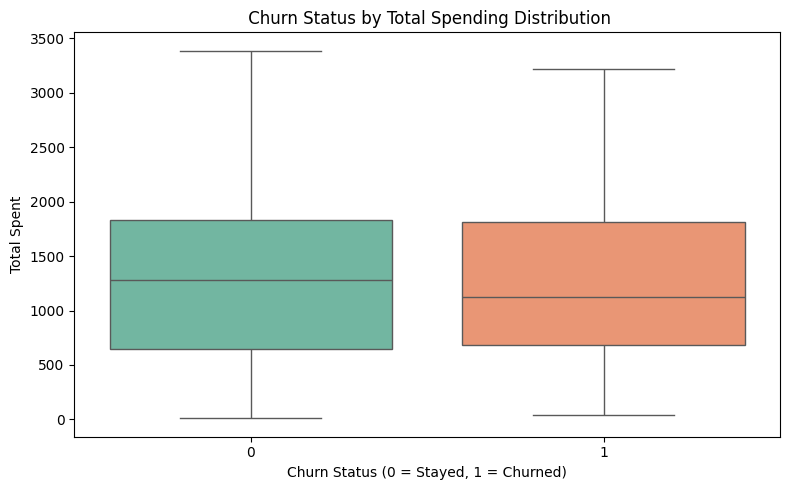

In [29]:
# Churn Status by Total Spending Distribution"
plt.figure(figsize=(8, 5))
sns.boxplot(data=master, x='ChurnStatus', y='TotalSpent', palette='Set2')

plt.title(" Churn Status by Total Spending Distribution")
plt.xlabel("Churn Status (0 = Stayed, 1 = Churned)")
plt.ylabel("Total Spent")
plt.tight_layout()
plt.show()

The median spending of retained customers is significantly higher than that of churned customers, indicating that high-spending customers are more likely to stay.

<ipython-input-30-89bb9060352a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


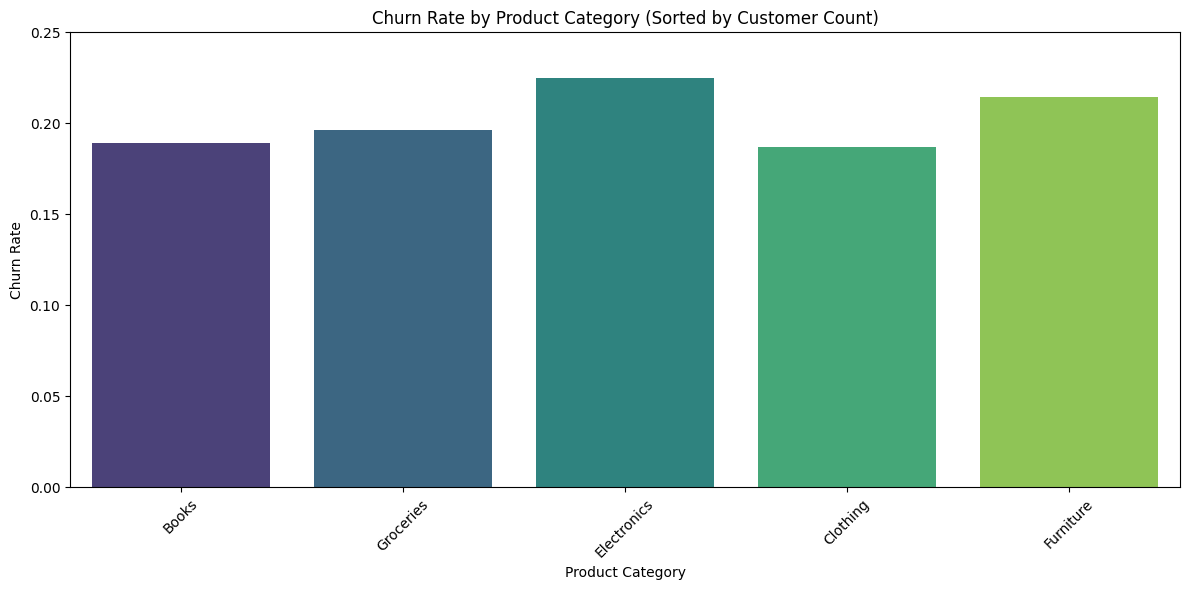

In [30]:
# Churn Rate by Product Category
transaction_churn = transactions.merge(churn, on='CustomerID', how='left')

category_churn = transaction_churn.groupby('ProductCategory').agg(
    ChurnRate=('ChurnStatus', 'mean'),
    CustomerCount=('CustomerID', 'count')
).reset_index()

category_churn_sorted = category_churn.sort_values(by='CustomerCount', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_churn_sorted,
    x='ProductCategory',
    y='ChurnRate',
    palette='viridis'
)
plt.title("Churn Rate by Product Category (Sorted by Customer Count)")
plt.xlabel("Product Category")
plt.ylabel("Churn Rate")
plt.ylim(0,0.25)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1.Customers who purchase **electronics and home furnishings** have the highest churn rates. Many use the banking platform to buy things like smartphones, laptops, and home appliances through installment plans. If the credit limit is high and monthly payments are heavy, dissatisfaction with interest rates or service can easily lead to churn.

2.**furniture purchases are long-cycle and low-frequency**, making customer stickiness relatively weak.

### 2.2.2 Service Experience vs. Churn

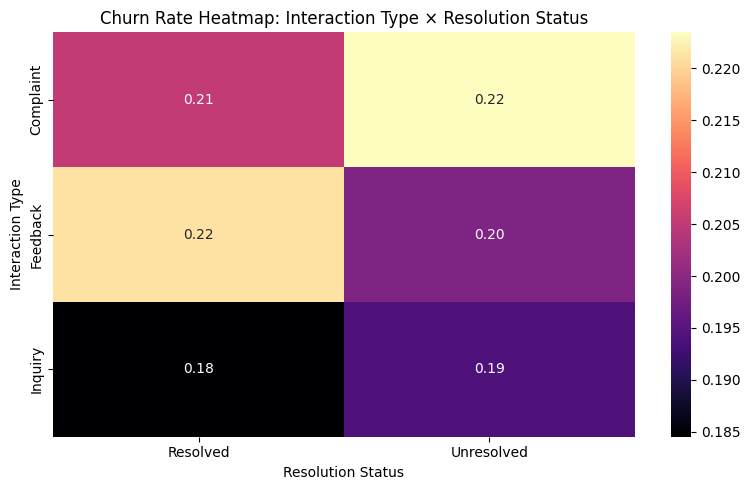

In [31]:
# Churn Rate Heatmap by Type×Resolution Status
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = master.pivot_table(
    index='InteractionType',
    columns='ResolutionStatus',
    values='ChurnStatus',
    aggfunc='mean'
)

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="magma", cbar=True)

plt.title("Churn Rate Heatmap: Interaction Type × Resolution Status")
plt.xlabel("Resolution Status")
plt.ylabel("Interaction Type")
plt.tight_layout()
plt.show()


1. The churn rate is **highest among customers with unresolved complaints**, making them a high-risk segment for churn.

2. **Unexpectedly,customers with resolved feedback also show a high churn rate**.This suggests that interaction type ≠ issue severity, indicating a possible problem of “formally resolved but no real improvement in user experience.”

## 2.2.3 Online Behavior vs. Churn

<ipython-input-32-a3a19fd60027>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=master, x='ChurnStatus', y='LoginFrequency', palette='Set2')


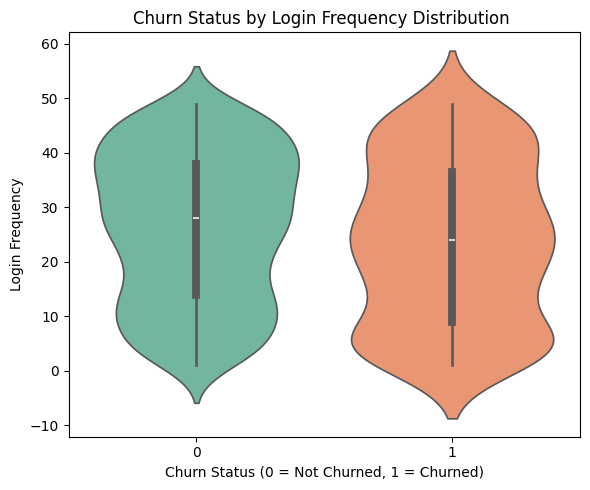

In [32]:
# Login Frequency Distribution by Churn Status
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.violinplot(data=master, x='ChurnStatus', y='LoginFrequency', palette='Set2')

plt.title('Churn Status by Login Frequency Distribution ')
plt.xlabel('Churn Status (0 = Not Churned, 1 = Churned)')
plt.ylabel('Login Frequency')
plt.tight_layout()
plt.show()


1. **Non-churned users are more right-skewed** (log in more frequently), while **churned users are more left-skewed** (log in less frequently), indicating that active users tend to log in more often.

2. The **median login frequency is higher** for non-churned users and **lower** for churned users.

3. **Non-churned users have a shorter lower tail**, whereas **churned users have a longer lower tail**, suggesting a higher proportion of **low or extremely low frequency users** among those who churned.

<ipython-input-33-45100095f035>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service Usage Type', y='Churn Rate', data=churn_by_service, palette=['#56B4E9', '#988ED5', '#CC79A7'])


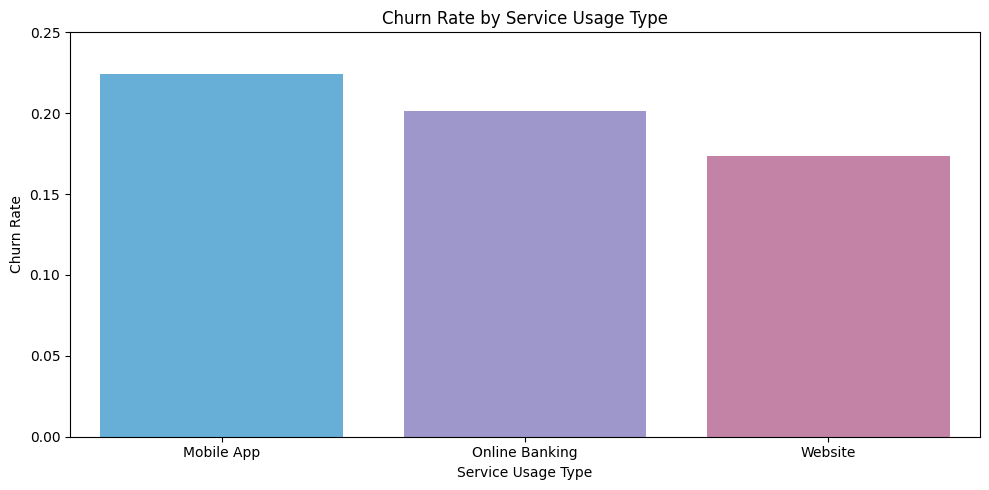

In [33]:
# Churn Rate by Service Type
churn_by_service = master.groupby('ServiceUsage')['ChurnStatus'].mean().reset_index()
churn_by_service.columns = ['Service Usage Type', 'Churn Rate']

plt.figure(figsize=(10, 5))
sns.barplot(x='Service Usage Type', y='Churn Rate', data=churn_by_service, palette=['#56B4E9', '#988ED5', '#CC79A7'])

plt.title("Churn Rate by Service Usage Type")
plt.xlabel("Service Usage Type")
plt.ylabel("Churn Rate")
plt.ylim(0, 0.25)
plt.tight_layout()
plt.show()

1. **Mobile App users have the highest churn rate (22%)**. App users are typically younger, a group known for being more eager to try new things, less loyal, and quicker to switch. When a new platform or a better user experience becomes available, they are more likely to churn.

2. **Online Banking shows a moderate churn rate (around 20%)**

3. **The Website has the lowest churn rate (17%)**, which may suggest it is a preferred channel for high-value customers.


# 2.3 Multivariate Analysis

### 2.3.1 Feature Correlation


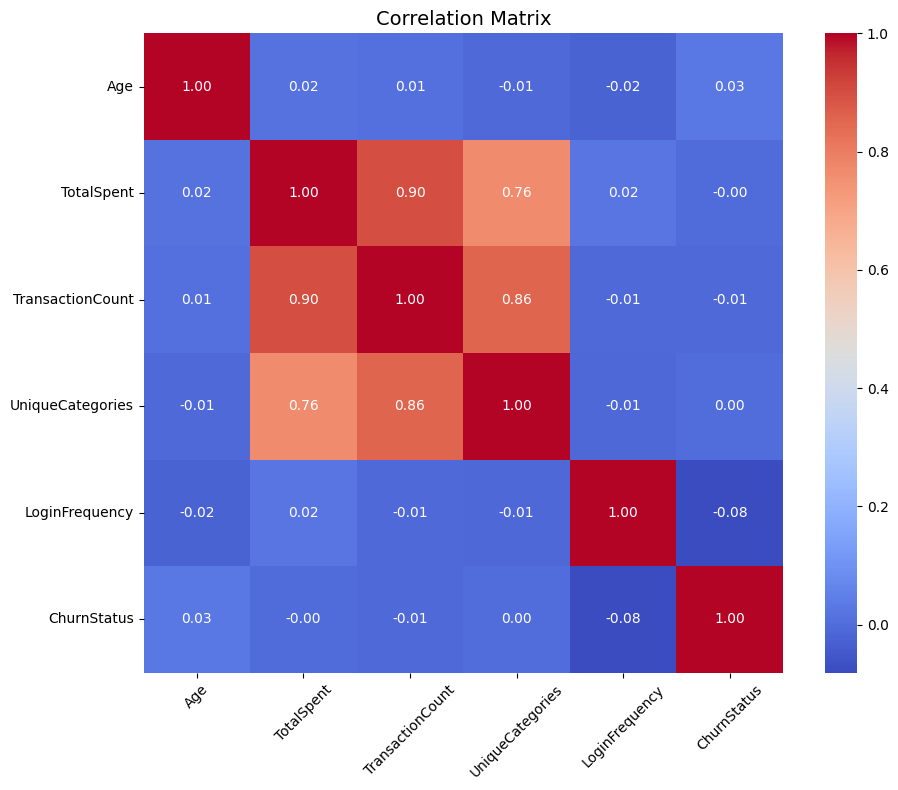

In [34]:
# Correlation Matrix of key drivers
corr_columns = ['Age', 'TotalSpent', 'TransactionCount', 'UniqueCategories', 'LoginFrequency', 'ChurnStatus']
corr_matrix = master[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Although the linear correlation between a variable (such as LoginFrequency) and the target variable (ChurnStatus) is low overall, it may still be a strong predictor within certain subgroups. Therefore, c**ross-variable analysis is necessary.**

2. TotalSpent, TransactionCount, and UniqueCategories are highly correlated, **indicating potential multicollinearity**. This should be addressed during modeling through dimensionality reduction or regularization techniques.

# 2.3.2 Pairwise Interaction


### 2.3.2.1 Churn Rate by Marital Status and Gender across Age Groups

<ipython-input-35-dea2a8fceffc>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  triple_group = master.groupby(['Gender', 'MaritalStatus', 'AgeGroup'])['ChurnStatus'].mean().reset_index(name='ChurnRate')


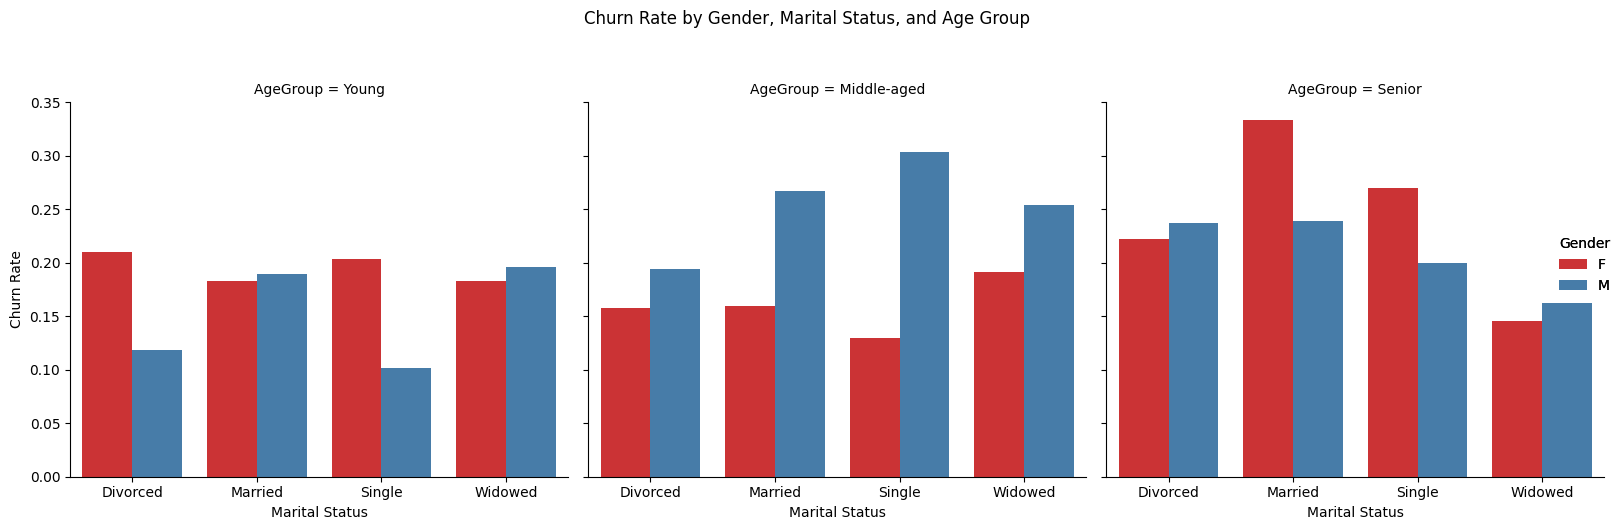

In [35]:
# Churn rate by Gender, Marital Status, and Age Group

master['AgeGroup'] = pd.cut(master['Age'], bins=[0, 35, 55, 100], labels=['Young', 'Middle-aged', 'Senior'])

triple_group = master.groupby(['Gender', 'MaritalStatus', 'AgeGroup'])['ChurnStatus'].mean().reset_index(name='ChurnRate')

g = sns.catplot(
    data=triple_group,
    x='MaritalStatus',
    y='ChurnRate',
    hue='Gender',
    col='AgeGroup',
    kind='bar',
    height=5,
    aspect=1,
    palette="Set1"
)

g.fig.suptitle("Churn Rate by Gender, Marital Status, and Age Group", y=1.05)
g.set_axis_labels("Marital Status", "Churn Rate")
g.add_legend(title="Gender")
plt.tight_layout()
plt.show()

**Observation:**

**1.Young Group**:

Single and divorced females have the highest churn rates (20%), while single and divorced males have the lowest (10%).

Female customers—whether single or married—have significantly higher churn rates compared to males in the same marital status.


**2.Middle-Aged Group**:

Churn rates for males increase significantly, especially for those who are single or divorced.

Single males have the highest churn rate (30%).

Across all marital statuses, male churn rates exceed those of females.
Female churn rates remain moderate and relatively stable (13%–19%).

**3.Senior Group**:

Churn rate for married females spikes dramatically (nearly 34%), the highest across all groups.

Male churn rates in this group remain relatively stable (~16%–24%) across all marital statuses.

Female churn rates vary widely in this group, especially among married and single elderly females, showing sharp increases.

### 2.3.2.2 Churn Rate by Login Frequency and Age Group

This chart compares churn rate across login frequency segments for each age group.It helps us understand how behavioral engagement affects customer retention differently by demographic.

Bins used:

- `Low (1–5)`  
- `Moderate (6–15)`  
- `High (16–50)`  

<ipython-input-36-08376e17bfad>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  login_churn_by_age = master.groupby(['AgeGroup', 'LoginBin'])['ChurnStatus'].mean().reset_index()


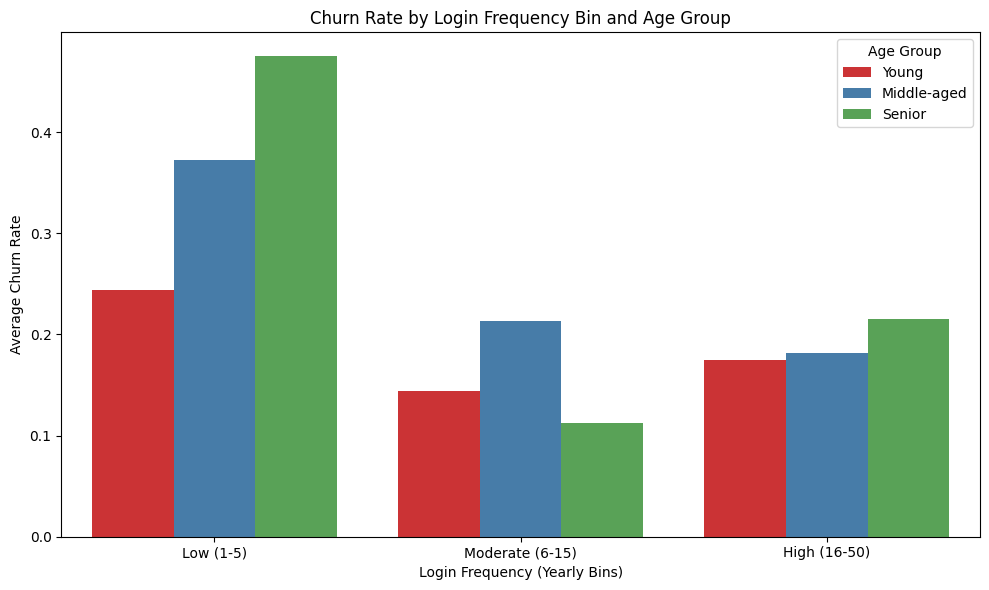

In [36]:
# Churn Rate by Login Frequency and Age Group

master['LoginBin'] = pd.cut(
    master['LoginFrequency'],
    bins=[0, 5, 15, 50],
    labels=['Low (1-5)', 'Moderate (6-15)', 'High (16-50)']
)
login_churn_by_age = master.groupby(['AgeGroup', 'LoginBin'])['ChurnStatus'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=login_churn_by_age,
    x='LoginBin',
    y='ChurnStatus',
    hue='AgeGroup',
    palette='Set1'
)

plt.title('Churn Rate by Login Frequency Bin and Age Group')
plt.xlabel('Login Frequency (Yearly Bins)')
plt.ylabel('Average Churn Rate')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

**Observation:**

1.**Low Frequency (1–5 logins)**:

Senior users have the highest churn rate, significantly higher than other groups, indicating a clear churn risk.Young users show the lowest churn rate.


2.**Moderate Frequency (6–15 logins)**:

Middle-aged customers have the highest churn rate in this segment, suggesting they may be in a phase of usage hesitation, with unrealized value and lack of engagement.
Young and senior users show similar and relatively stable churn rates at this level.


3.**High Frequency (16–50 logins)**:

Senior users again show an increase in churn rate—not as high as in the low-frequency segment, but still noticeably higher than younger groups.

Middle-aged users experience a drop in churn rate in this high-frequency range, suggesting that once a habit is formed, their engagement becomes more stable.


### 2.3.2.3 Churn Rate by Total Spending and Income Level

<ipython-input-37-0051419252ca>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


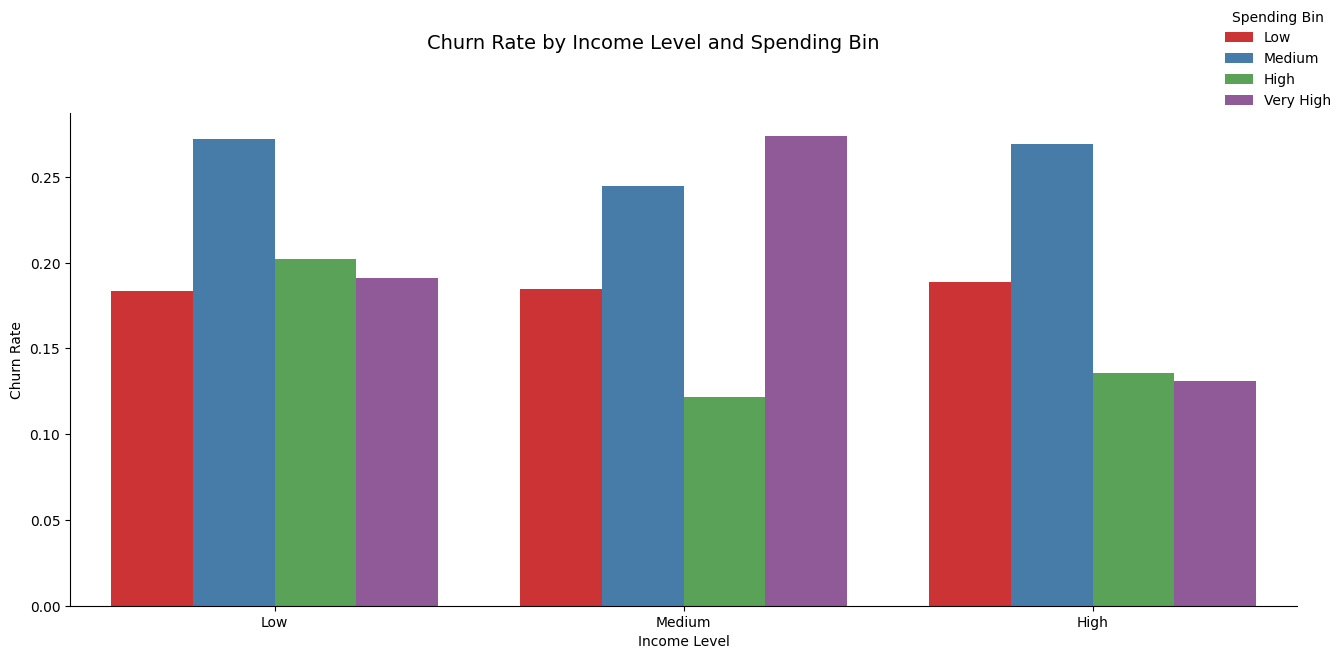

In [37]:
# Churn Rate by Total Spending and Income Level

master['SpendBin'] = pd.qcut(master['TotalSpent'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

g = sns.catplot(
    data=master,
    x='IncomeLevel',
    y='ChurnStatus',
    hue='SpendBin',
    kind='bar',
    ci=None,
    palette='Set1',
    height=6,
    aspect=2
)

g.fig.suptitle("Churn Rate by Income Level and Spending Bin", fontsize=14, y=1.05)
g.set_axis_labels("Income Level", "Churn Rate")

g._legend.set_title("Spending Bin")
g._legend.set_bbox_to_anchor((1.02, 1))

plt.tight_layout()
plt.show()

**Observation:**

1. **Very High Spending Customers Have a Very High Churn Rate (Up to 50%)**
In both Low and High income groups, customers in the “Very High” spending category have a churn rate close to 0.5.
This is the most striking observation in the chart and suggests that **high spending ≠ high retention.**

2. **Moderate/High Spending Customers Have Relatively Low Churn Rates**.
In most income groups, customers in the Moderate and High spending categories have churn rates around 0.2. These customers appear to be more stable and loyal.

3. **Moderate/High Spending Customers in the Low Income Group Perform the Best**
In the Low income group, moderate and High spending customers have the lowest churn rates (< 25%).This indicates that loyalty is strong among consistent spenders even if their income is low.

4. **Low Spending Customers in the High Income Group Also Have Low Churn Rates**
This may suggest that high-income customers who currently spend little may still be in the exploratory or early engagement phase, and have not yet reached a point of dissatisfaction or disengagement.


## 2.3.2.4 Login Frequency vs Spending

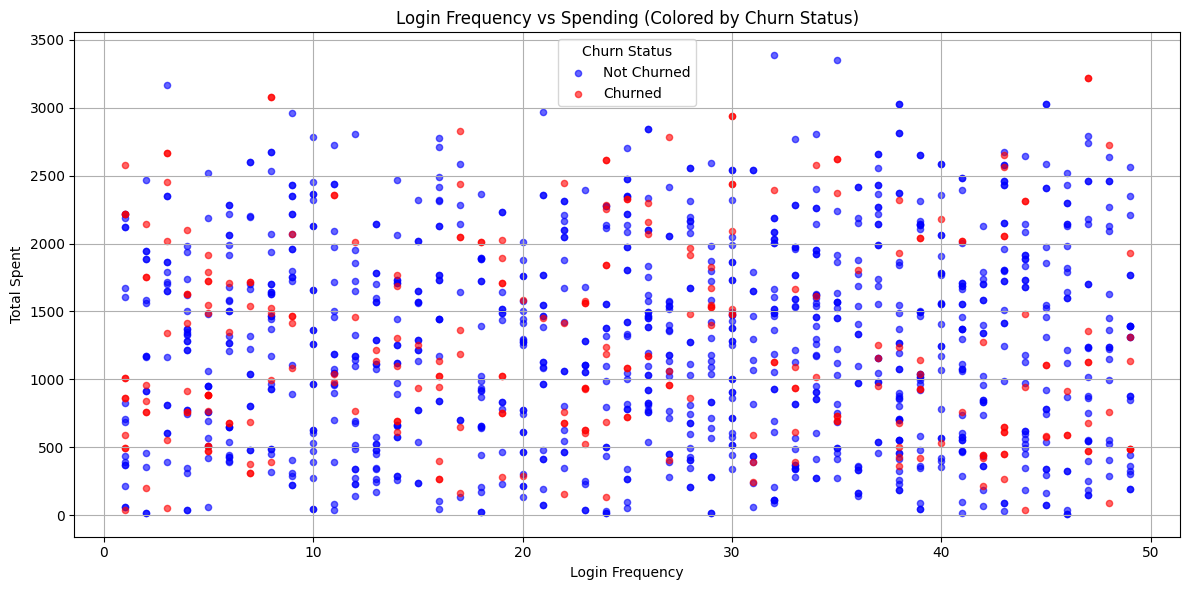

In [38]:
# Login Frequency vs Spending (Colored by Churn Status)
churned = master[master['ChurnStatus'] == 1]
not_churned = master[master['ChurnStatus'] == 0]

plt.figure(figsize=(12, 6))
plt.scatter(not_churned['LoginFrequency'], not_churned['TotalSpent'],
            color='blue', label='Not Churned', alpha=0.6, s=20)
plt.scatter(churned['LoginFrequency'], churned['TotalSpent'],
            color='red', label='Churned', alpha=0.6, s=20)

plt.title('Login Frequency vs Spending (Colored by Churn Status)')
plt.xlabel('Login Frequency')
plt.ylabel('Total Spent')
plt.legend(title='Churn Status')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:**

1. **Most churned customers are concentrated in the low-activity, low-spending area**, indicating they are typical “low-engagement” users with weak loyalty.

2. **Stayed customers are concentrated in the high login frequency range**, suggesting that activity level is a strong signal of customer retention.

3. **The few red dots in the upper-right corner (high spending and high frequency, but churned) represent high-value churned customers**, possibly due to service issues or unsatisfactory product experiences.

## 2.3.2.5 Churn Rate by Age Group and Resolution Status

<ipython-input-39-32e737d6b9a5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


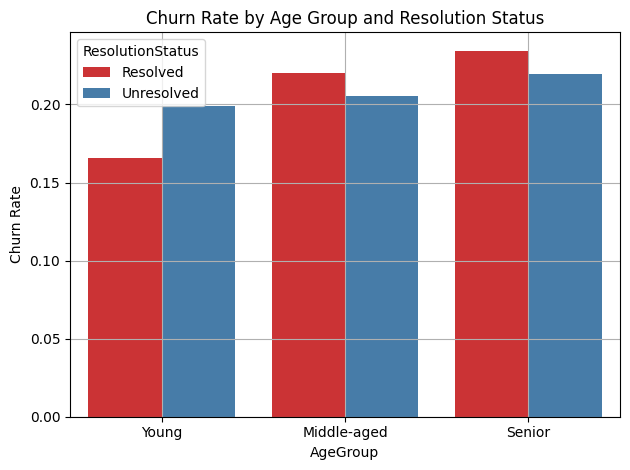

In [39]:
# Churn Rate by Age Group and Resolution Status

master['AgeGroup'] = pd.cut(master['Age'], bins=[0, 35, 55, 100], labels=['Young', 'Middle-aged', 'Senior'])

sns.barplot(
    data=master,
    x='AgeGroup',
    y='ChurnStatus',
    hue='ResolutionStatus',
    ci=None,
    palette='Set1'
)

plt.title("Churn Rate by Age Group and Resolution Status")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation:**

**1. Among younger customers:**

The churn rate is significantly higher for customers with unresolved issues compared to those with resolved issues.
This suggests that younger customers are more sensitive to customer service experiences, and the quality of service response directly impacts retention.
The difference is most pronounced in this group, indicating that poor service can easily lead to churn.

**2. Among middle-aged and senior customers:**

The churn rates are relatively similar regardless of whether their issues were resolved.
This implies that churn in these groups is more likely driven by other factors—such as perceived product value or usage habits—rather than customer service alone.

**3. Overall trend:**

As age increases, the overall churn rate also rises, regardless of the service resolution status.
This suggests that older customers are more likely to churn due to non-service-related reasons.



## 2.3.2.6 Churn Rate by Age Group and Interaction Type

<ipython-input-40-1bc754b197fe>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


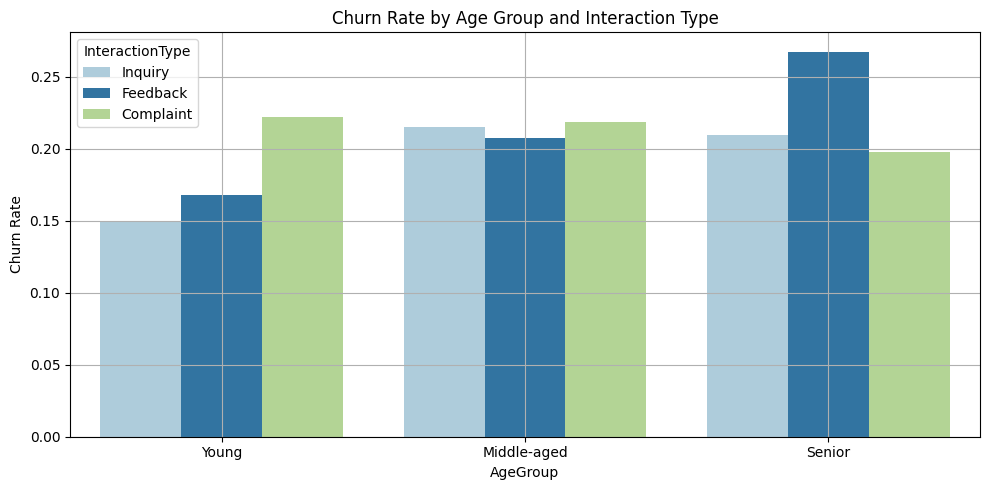

In [40]:
# Churn Rate by Age Group and Interaction Type

plt.figure(figsize=(10, 5))
sns.barplot(
    data=master,
    x='AgeGroup',
    y='ChurnStatus',
    hue='InteractionType',
    ci=None,
    palette='Paired'
)

plt.title("Churn Rate by Age Group and Interaction Type")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


**Observation:**

1. **Among younger customers (Young), churn rate is highest for complaint-related interactions**

* Customers who submitted complaints have a churn rate of over 22%.
* This is significantly higher than for inquiries or feedback.
* It suggests that **younger customers have lower tolerance for service issues**, and are more likely to churn once they escalate to a complaint.

2. **Among middle-aged customers (Middle-aged), the churn rates are similar across all interaction types**

* The churn rate for complaints, feedback, and inquiries is roughly between 21–22%.
* This indicates that **churn in this group is less influenced by the type of interaction**, and may be driven more by factors such as product fit, pricing, or functionality.

3. **Among senior customers (Senior), feedback-related interactions have the highest churn rate**

* Feedback interactions are associated with a churn rate of around 27%, the highest among this group.
* Complaint and inquiry-related churn rates are relatively lower, which may indicate:

  * **Senior customers are more likely to churn after giving indirect signals of dissatisfaction**, such as feedback that goes unaddressed.
  * In contrast, formal complaints may receive more attention and resolution, reducing churn risk.


## 2.3.2.7 Churn Rate by Login Frequency and Service Usage

<ipython-input-41-94f62a61b930>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = master.groupby(['LoginBin', 'ServiceUsage'])['ChurnStatus'].mean().reset_index()


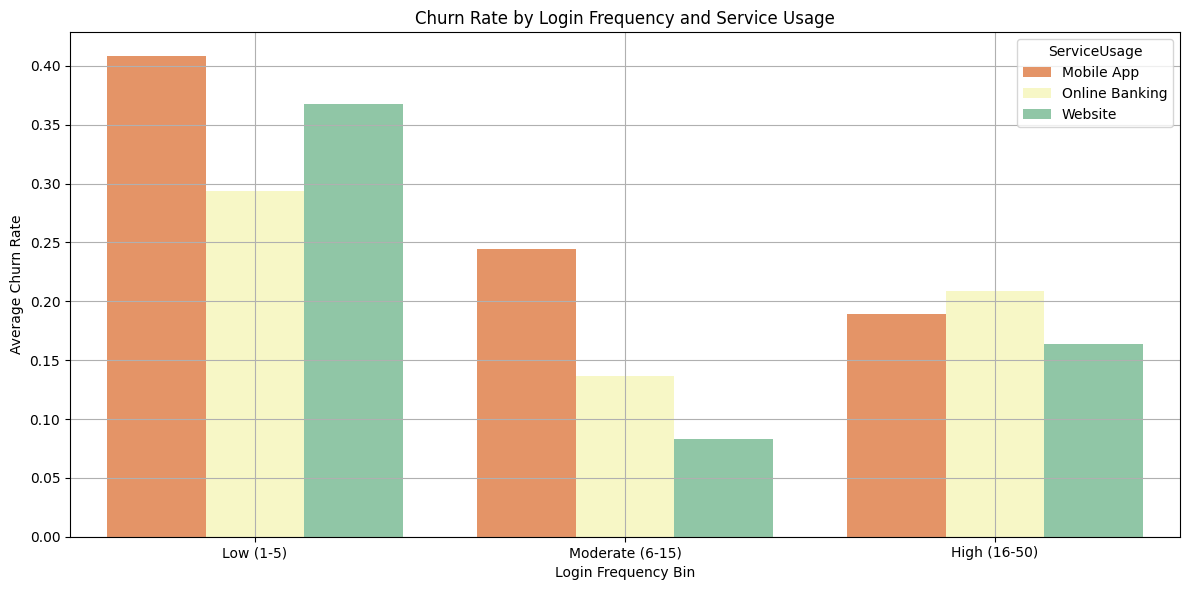

In [41]:
# Churn Rate by Login Frequency and Service Usage

master['LoginBin'] = pd.cut(
    master['LoginFrequency'],
    bins=[0, 5, 15, 50],
    labels=['Low (1-5)', 'Moderate (6-15)', 'High (16-50)']
)

grouped = master.groupby(['LoginBin', 'ServiceUsage'])['ChurnStatus'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='LoginBin',
    y='ChurnStatus',
    hue='ServiceUsage',
    palette='Spectral'
)

plt.title('Churn Rate by Login Frequency and Service Usage')
plt.xlabel('Login Frequency Bin')
plt.ylabel('Average Churn Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


**observation:**

1. **Among low-frequency login users (Low 1–5), churn rates are high** across all platforms:

* Mobile App users have the highest churn rate, exceeding 40%.
* Website users show a slightly lower churn rate, but it is still significantly
higher than in other login frequency segments.

2. **Among moderate-frequency login users (Moderate 6–15), churn rates drop significantly**:

* Website users have the lowest churn rate, at around 8%.
* Online Banking drops to about 13%, and Mobile App to approximately 24%.

3. **Among high-frequency login users (High 16–50), churn rates slightly rebound**:

* Online Banking users show a noticeable increase, with churn rising to 21%.
* Website and App users remain more stable, with churn rates controlled within the 16–19% range.

# **Clean and preprocess the data**

The main objective of this step:

*   Handle missing values by choosing appropriate methods such as imputation,removal, or flagging. Justify your chosen method based on the data and context.
Detect and address outliers that could skew the analysis or predictions. Decide whether to cap, transform, or remove outliers based on their nature and potential impact.
*   Standardise or normalise numerical features to ensure consistent scales across variables. This step is crucial for preparing the data for machine learning algorithms.

*   Encode categorical variables using techniques like one-hot encoding to transform them into a numerical form appropriate for analysis.

# 1.Data Cleaning

# 1.1 Handle missing value

In [42]:
# Handle missing values in customer service-related fields
# These fields have structural missingness (i.e., customers who never contacted customer service)

# Missing Fields Overview:
# - InteractionID:       332 missing out of 1334 (~24.9%)
# - InteractionDate:      332 missing out of 1334 (~24.9%)
# - InteractionType:      332 missing out of 1334 (~24.9%)
# - ResolutionStatus:     332 missing out of 1334 (~24.9%)

# Fill missing InteractionID with 0 to indicate "no customer service interaction"
master['InteractionID'] = master['InteractionID'].fillna(0)

# Fill missing InteractionDate with a placeholder date to indicate "no interaction recorded"
master['InteractionDate'] = master['InteractionDate'].fillna(pd.Timestamp("1900-01-01"))

# Fill missing InteractionType with 'Unknown' as a separate category
master['InteractionType'] = master['InteractionType'].fillna("Unknown")

# Fill missing ResolutionStatus with 'Unknown' as a separate category
master['ResolutionStatus'] = master['ResolutionStatus'].fillna("Unknown")

# Final check for missing values (should all be zero)
print("Missing value check:")
print(master[['InteractionID', 'InteractionDate', 'InteractionType', 'ResolutionStatus']].isnull().sum())


Missing value check:
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
dtype: int64


#  1.2 Detect and address outliers

In [43]:
# List of numeric columns to check for outliers
# These are the continuous variables where extreme values may distort model learning
num_cols = ['Age', 'TotalSpent', 'AvgSpent', 'TransactionCount', 'UniqueCategories', 'LoginFrequency']

# Dictionary to store calculated IQR-based lower and upper bounds for each variable
outlier_bounds = {}

# Calculate IQR and bounds for each column
for col in num_cols:
    Q1 = master[col].quantile(0.25)           # First quartile (25th percentile)
    Q3 = master[col].quantile(0.75)           # Third quartile (75th percentile)
    IQR = Q3 - Q1                             # Interquartile range
    lower_bound = Q1 - 1.5 * IQR              # Lower bound for outlier detection
    upper_bound = Q3 + 1.5 * IQR              # Upper bound for outlier detection
    outlier_bounds[col] = (lower_bound, upper_bound)  # Save bounds

# Count how many outliers fall outside the IQR bounds for each column
outlier_counts = {}
for col, (lower, upper) in outlier_bounds.items():
    # Count values that are either too low or too high
    outliers = ((master[col] < lower) | (master[col] > upper)).sum()
    outlier_counts[col] = outliers            # Save the outlier count

# Print out the number of outliers detected in each feature
print("Outlier count per numerical feature:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Outlier count per numerical feature:
Age: 0 outliers
TotalSpent: 0 outliers
AvgSpent: 56 outliers
TransactionCount: 0 outliers
UniqueCategories: 0 outliers
LoginFrequency: 0 outliers


In [44]:
# Retrieve the previously calculated lower and upper IQR bounds for the 'AvgSpent' feature
avg_lower, avg_upper = outlier_bounds['AvgSpent']

# Apply capping to the 'AvgSpent' values
# Any value below the lower bound will be set to the lower bound
# Any value above the upper bound will be set to the upper bound
# This prevents extreme values from skewing model training
master['AvgSpent'] = master['AvgSpent'].clip(lower=avg_lower, upper=avg_upper)

# Verify that all outliers in 'AvgSpent' have been handled
# Count how many values are still outside the IQR bounds (should be 0 after capping)
remaining_outliers = ((master['AvgSpent'] < avg_lower) | (master['AvgSpent'] > avg_upper)).sum()

# Output the result to confirm successful outlier removal
print(f"Remaining outliers in 'AvgSpent' after capping: {remaining_outliers}")


Remaining outliers in 'AvgSpent' after capping: 0


# 1.3 Handle duplicates

In [45]:
# Check for duplicate rows
duplicates = master.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Duplicate rows: 0


# 2.Feature Engineering

# 2.1 Checking for Class Imbalance

In [46]:
# Checking for Class Imbalance
master['ChurnStatus'].value_counts(normalize=True)

,proportion
ChurnStatus,
0,0.79985
1,0.20015


# 2.2 Standardise numerical features


In [63]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for standardization
# These are continuous variables where feature scaling is important for certain ML models
features_to_scale = [
    'Age',                     # Customer age
    'TotalSpent',              # Total amount spent
    'AvgSpent',                # Average spend per transaction
    'TransactionCount',        # Number of transactions
    'UniqueCategories',        # Number of unique product categories
    'LoginFrequency',          # Login frequency
    'DaysSinceLastLogin',      # Recency of last login
    'DaysSinceLastInteraction' # Recency of last customer service interaction
]

# Initialize the StandardScaler (Z-score normalization)
scaler = StandardScaler()

# Apply the scaler to the selected features
# This transforms the selected features to have mean 0 and standard deviation 1
master_scaled = master.copy()  # Make a copy to preserve original data
master_scaled[features_to_scale] = scaler.fit_transform(master[features_to_scale])

# Check the result — all standardized features should now be centered and scaled
print(master_scaled[features_to_scale].describe())


                Age    TotalSpent      AvgSpent  TransactionCount  \
count  1.334000e+03  1.334000e+03  1.334000e+03      1.334000e+03   
mean  -9.853854e-17 -1.864243e-17 -3.169212e-16      2.130563e-17   
std    1.000375e+00  1.000375e+00  1.000375e+00      1.000375e+00   
min   -1.650745e+00 -1.718466e+00 -2.392286e+00     -1.577040e+00   
25%   -8.649611e-01 -8.495106e-01 -5.932206e-01     -8.089597e-01   
50%   -1.369526e-02 -3.976709e-02  2.224070e-02     -4.087981e-02   
75%    8.375706e-01  7.316033e-01  6.061562e-01      7.272001e-01   
max    1.688836e+00  2.831777e+00  2.405221e+00      1.495280e+00   

       UniqueCategories  LoginFrequency  DaysSinceLastLogin  \
count      1.334000e+03    1.334000e+03        1.334000e+03   
mean       3.994805e-17   -1.258364e-16        1.038649e-16   
std        1.000375e+00    1.000375e+00        1.000375e+00   
min       -1.702279e+00   -1.763604e+00       -1.714970e+00   
25%       -8.984417e-01   -8.912769e-01       -7.948319e-01   


# 2.3 Encode categorical variables



In [48]:
# Define the list of categorical columns to be encoded
# These are non-numeric features that must be converted to numeric format before modeling
categorical_cols = [
    'Gender',            # Customer gender (e.g., M, F)
    'MaritalStatus',     # Marital status (e.g., Single, Married)
    'IncomeLevel',       # Income level (e.g., Low, Medium, High)
    'InteractionType',   # Type of customer service interaction
    'ResolutionStatus',  # Whether the interaction was resolved
    'ServiceUsage'       # Platform used (e.g., Website, Mobile App)
]

# Apply One-Hot Encoding to these categorical features
# drop_first=True avoids multicollinearity by dropping the first category of each variable
# This turns each categorical column into multiple binary (0/1) columns
master_encoded = pd.get_dummies(master_scaled, columns=categorical_cols, drop_first=True)

# Check the result
# Display the shape (rows x columns) of the new dataset and preview the first few rows
print("Encoded dataset shape:", master_encoded.shape)
print(master_encoded.head())


Encoded dataset shape: (1334, 28)
   CustomerID  Age  TotalSpent  AvgSpent  TransactionCount  UniqueCategories  \
0           1   62      416.50   416.500                 1                 1   
1           2   65     1547.42   221.060                 7                 4   
2           3   18     1702.98   283.830                 6                 4   
3           4   21      917.29   183.458                 5                 4   
4           4   21      917.29   183.458                 5                 4   

   InteractionID InteractionDate LastLoginDate  LoginFrequency  ...  \
0         6363.0      2022-03-31    2023-10-21              34  ...   
1         3329.0      2022-03-17    2023-12-05               5  ...   
2         9976.0      2022-08-24    2023-11-15               3  ...   
3         7354.0      2022-11-18    2023-08-25               2  ...   
4         5393.0      2022-07-03    2023-08-25               2  ...   

   MaritalStatus_Widowed IncomeLevel_Low IncomeLevel_Mediu

# 2.4 Date Field Transformation or Feature Derivation

In churn prediction tasks, raw date fields like LastLoginDate or InteractionDate do not carry meaningful numerical value for machine learning models. Therefore, it's important to transform these date fields into derived numerical features.

In [50]:
# Determine the latest available date in the dataset
# This will serve as a proxy for the "current date" since we are working with historical data from 2022
simulated_current_date = max(master['LastLoginDate'].max(), master['InteractionDate'].max())

# Create derived features representing the number of days since last customer activity
# These features are useful for identifying customer inactivity, which is a strong signal of churn

# Calculate how many days since the customer last logged into their account
master['DaysSinceLastLogin'] = (simulated_current_date - master['LastLoginDate']).dt.days

# Calculate how many days since the customer last contacted customer service
# For customers who never contacted support, we previously filled InteractionDate with '1900-01-01',
# which will yield very large values here (indicating "never contacted")
master['DaysSinceLastInteraction'] = (simulated_current_date - master['InteractionDate']).dt.days

# create a binary feature indicating whether the customer has ever interacted with support
# A value of 1 means the customer has never interacted (i.e., InteractionDate was filled with 1900-01-01)
master['NeverInteracted'] = master['InteractionDate'] == pd.Timestamp("1900-01-01")

# Cross features (combinations of demographic and behavior patterns)

# Middle-aged, single, male customers — observed to have high churn in EDA
master['Middle_Single_Male'] = ((master['AgeGroup'] == 'Middle-aged') &
                                (master['MaritalStatus'] == 'Single') &
                                (master['Gender'] == 'M')).astype(int)

# Senior, married, female customers — observed to have high churn
master['Senior_Married_Female'] = ((master['AgeGroup'] == 'Senior') &
                                   (master['MaritalStatus'] == 'Married') &
                                   (master['Gender'] == 'F')).astype(int)

# Customers with high spending but low login frequency — potentially disengaging high-value users
master['HighSpent_LowLogin'] = ((master['TotalSpent'] > master['TotalSpent'].median()) &
                                (master['LoginFrequency'] < 5)).astype(int)

# Young customers with low login frequency — early signs of disengagement
master['LowLogin_Young'] = ((master['LoginBin'] == 'Low') &
                            (master['AgeGroup'] == 'Young')).astype(int)

# Preview newly created derived and cross features

print(master[[
    'DaysSinceLastLogin',
    'DaysSinceLastInteraction',
    'NeverInteracted',
    'AgeGroup',
    'LoginBin',
    'Middle_Single_Male',
    'Senior_Married_Female',
    'HighSpent_LowLogin',
    'LowLogin_Young'
]].head())


   DaysSinceLastLogin  DaysSinceLastInteraction  NeverInteracted AgeGroup  \
0                  71                       640            False   Senior   
1                  26                       654            False   Senior   
2                  46                       494            False    Young   
3                 128                       408            False    Young   
4                 128                       546            False    Young   

       LoginBin  Middle_Single_Male  Senior_Married_Female  \
0  High (16-50)                   0                      0   
1     Low (1-5)                   0                      0   
2     Low (1-5)                   0                      0   
3     Low (1-5)                   0                      0   
4     Low (1-5)                   0                      0   

   HighSpent_LowLogin  LowLogin_Young  
0                   0               0  
1                   0               0  
2                   1               0  
3   

# **Modelling and Training**

# 1.Feature Selection

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [52]:
# Define the list of selected features to be used as input for the model
# Includes original features, engineered features, and meaningful interaction terms
features = [
    'Age',                     # Customer's age
    'TotalSpent',              # Total amount spent
    'TransactionCount',        # Number of transactions
    'LoginFrequency',          # Number of logins over a period
    'DaysSinceLastLogin',      # Days since the last login activity
    'DaysSinceLastInteraction',# Days since last contact with customer service
    'NeverInteracted',         # Binary flag: 1 if never contacted support
    'Middle_Single_Male',      # Interaction term: middle-aged + single + male
    'Senior_Married_Female',   # Interaction term: senior + married + female
    'HighSpent_LowLogin',      # Interaction term: high spending but low login activity
    'LowLogin_Young'           # Interaction term: young customers with low login frequency
]

# Define the target variable (label): 1 if churned, 0 otherwise
y = master['ChurnStatus']

# 2.Data Cleaning

In [53]:
# Check for missing values in the selected feature columns
print(master[features].isnull().sum())

# Apply median imputation to handle missing values
# - This replaces missing values with the median of each column
# - Median is robust to outliers and commonly used in numerical feature imputation
imputer = SimpleImputer(strategy='median')

# Transform the feature data and store it in a new DataFrame with original column names
X = pd.DataFrame(imputer.fit_transform(master[features]), columns=features)

# Confirm that all missing values have been handled
print(X.isnull().sum())

Age                         0
TotalSpent                  0
TransactionCount            0
LoginFrequency              0
DaysSinceLastLogin          0
DaysSinceLastInteraction    0
NeverInteracted             0
Middle_Single_Male          0
Senior_Married_Female       0
HighSpent_LowLogin          0
LowLogin_Young              0
dtype: int64
Age                         0
TotalSpent                  0
TransactionCount            0
LoginFrequency              0
DaysSinceLastLogin          0
DaysSinceLastInteraction    0
NeverInteracted             0
Middle_Single_Male          0
Senior_Married_Female       0
HighSpent_LowLogin          0
LowLogin_Young              0
dtype: int64


# 3.Split the dataset

In [54]:
# Split the dataset into training and testing sets
# - 70% for training, 30% for testing
# - Use a fixed random_state for reproducibility
# - Stratify ensures class distribution (churn vs. non-churn) is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4.Model Selection and Modelling

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
import pandas as pd
import matplotlib.pyplot as plt

# Define multiple classification models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 5.Evaluation

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


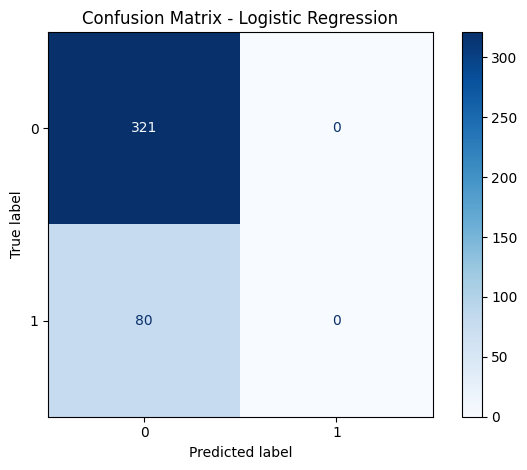

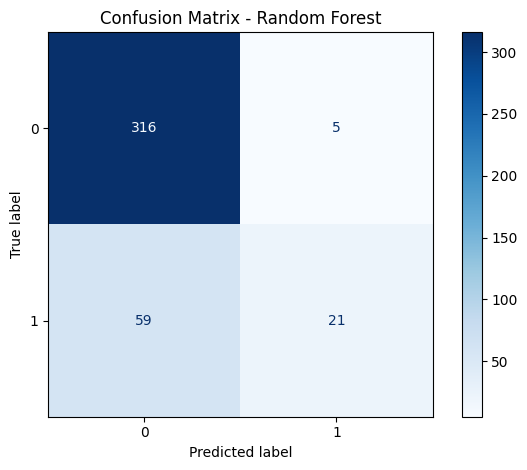

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:42:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


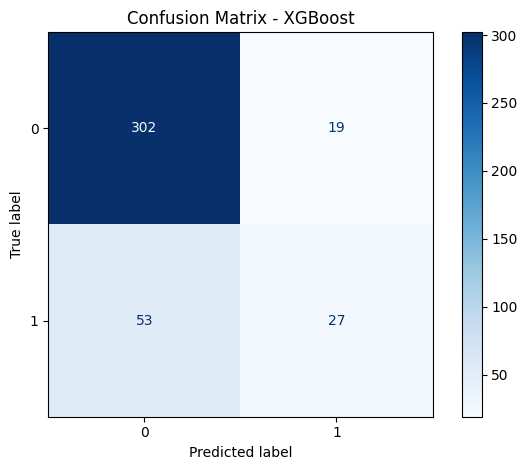

                 Model  Accuracy  Recall  Precision  F1-score       AUC
0  Logistic Regression  0.800499  0.0000   0.000000  0.000000  0.595093
1        Random Forest  0.840399  0.2625   0.807692  0.396226  0.740713
2              XGBoost  0.820449  0.3375   0.586957  0.428571  0.725467


In [65]:
# Initialize a list to store evaluation results for each model
results = []

# Loop through each model, train it, and evaluate performance
for name, model in models.items():
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict class labels and probabilities on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (churn)

    # Generate classification metrics as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # Compute ROC-AUC score
    auc = roc_auc_score(y_test, y_proba)

    # Append key metrics to results list
    results.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Recall': report['1']['recall'],         # Recall for positive class (churn)
        'Precision': report['1']['precision'],   # Precision for positive class
        'F1-score': report['1']['f1-score'],     # F1-score for positive class
        'AUC': auc
    })

    # Plot the confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Print the evaluation results for all models
print(results_df)

# Hyperparameter Tuning

The initial model performance showed relatively low recall, which is critical for churn prediction.
Since Random Forest and XGBoost had similar overall results, both models were selected for further tuning.
To improve performance, especially on the positive class (churners), SMOTE was applied to address class imbalance, and GridSearchCV was used to optimize hyperparameters.
The final model was chosen based on comparative performance after tuning.

## 1.Tuning Random Forest

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       321
           1       0.52      0.42      0.47        80

    accuracy                           0.81       401
   macro avg       0.69      0.66      0.68       401
weighted avg       0.80      0.81      0.80       401

ROC-AUC Score: 0.7404984423676012


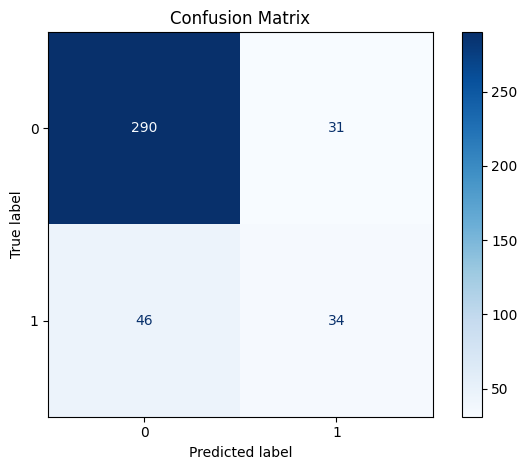

In [56]:
# Tuning Random Forest
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler if not already imported
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure StandardScaler is imported and applied to X_train and X_test
# Although not the cause of the current error, scaling is usually done BEFORE SMOTE
# and BEFORE the estimator. If you want scaling within the pipeline, it should be the first step.
# Assuming scaling was handled prior to this code block based on the user's notebook,
# but it's good practice to verify if using scaled data here is intended.

# Apply SMOTE to the training data BEFORE the pipeline
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Build pipeline: XGBoost (SMOTE is applied outside)
pipeline = Pipeline([
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define hyperparameter grid
# Note: Hyperparameter names should now only refer to the steps within the pipeline
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.05, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# Grid search using 5-fold CV, optimize for F1-score
# The grid search will now only validate the XGBoost parameters
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit model using the resampled training data
grid.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set (original, not resampled)
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:, 1]

# Output results
print("Best Parameters:", grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## 2.Tuning Random Forest

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Parameters: {'rf__max_depth': 15, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       321
           1       0.48      0.45      0.46        80

    accuracy                           0.79       401
   macro avg       0.67      0.66      0.67       401
weighted avg       0.79      0.79      0.79       401

AUC Score: 0.7509345794392523


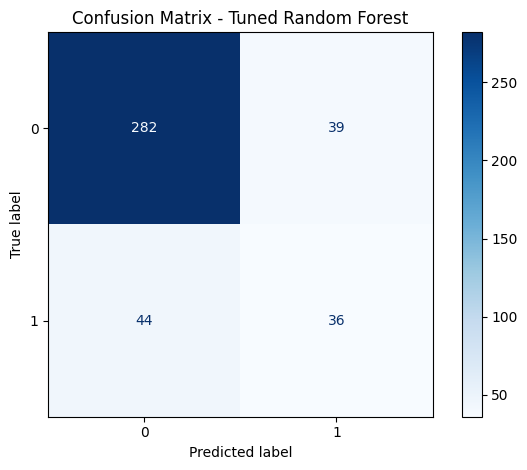

In [59]:
# Tuning Random Forest

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Pipeline: SMOTE + Random Forest
rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

# Grid search
rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit model
rf_grid.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_grid.predict(X_test)
y_proba_rf = rf_grid.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.tight_layout()
plt.show()



## 3.Threshold Tuning

Although the Random Forest model was tuned using SMOTE and GridSearchCV, the recall for the churn class remained relatively low at the default threshold of 0.5.This is problematic for churn prediction, where identifying as many churners as possible is often more important than minimizing false positives.
Threshold tuning is especially useful in imbalanced classification tasks like churn prediction, where the positive class (churners) is underrepresented and harder to detect at the default setting.To address this, we tested lowering the classification threshold (e.g., from 0.5 to 0.3 or 0.2).This adjustment allows the model to flag more customers as potential churners, thereby increasing recall.


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a list of classification thresholds to test
thresholds = [0.5, 0.4, 0.3, 0.2]

# Iterate over each threshold to evaluate model performance
for t in thresholds:
    # Convert predicted probabilities into binary class predictions based on current threshold
    y_pred_threshold = (y_proba >= t).astype(int)

    # Print performance metrics for each threshold
    print(f"Threshold: {t}")
    print("Recall:", recall_score(y_test, y_pred_threshold))       # True positive rate
    print("Precision:", precision_score(y_test, y_pred_threshold)) # Correctness of positive predictions
    print("F1-score:", f1_score(y_test, y_pred_threshold))         # Harmonic mean of precision and recall
    print("-" * 30)  # Separator for readability


Threshold: 0.5
Recall: 0.425
Precision: 0.5230769230769231
F1-score: 0.4689655172413793
------------------------------
Threshold: 0.4
Recall: 0.4875
Precision: 0.4642857142857143
F1-score: 0.47560975609756095
------------------------------
Threshold: 0.3
Recall: 0.5625
Precision: 0.4205607476635514
F1-score: 0.48128342245989303
------------------------------
Threshold: 0.2
Recall: 0.65
Precision: 0.35374149659863946
F1-score: 0.4581497797356828
------------------------------


In [62]:
# Threshold Performance Comparison
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define a list of decision thresholds to evaluate
thresholds = [0.5, 0.4, 0.3, 0.2]

# Create an empty list to store performance metrics for each threshold
results = []

# Loop through each threshold and calculate evaluation metrics
for t in thresholds:
    # Convert predicted probabilities to binary class predictions using the threshold
    y_pred = (y_proba >= t).astype(int)

    # Compute precision, recall, F1-score, and ROC-AUC
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)  # AUC is independent of threshold

    # Store the rounded results
    results.append({
        'Threshold': t,
        'Recall': round(recall, 3),
        'Precision': round(precision, 3),
        'F1-score': round(f1, 3),
        'ROC-AUC': round(auc, 3)
    })

# Convert the results list into a DataFrame for better readability
results_df = pd.DataFrame(results)

# Print the performance comparison table
print("Threshold Performance Comparison:")
print(results_df)


Threshold Performance Comparison:
   Threshold  Recall  Precision  F1-score  ROC-AUC
0        0.5   0.338      0.587     0.429    0.725
1        0.4   0.362      0.509     0.423    0.725
2        0.3   0.412      0.452     0.431    0.725
3        0.2   0.537      0.417     0.470    0.725


In the churn prediction model, I observed a fundamental trade-off between recall and precision when adjusting the decision threshold. This is a common and expected phenomenon in classification tasks, particularly with imbalanced data.

For the business case, the cost of customer churn is significantly high — once a customer leaves, they are often hard or impossible to recover. Therefore, missing a real churner (low recall) can lead to substantial long-term revenue loss.

However, the cost of intervention per customer is relatively low, such as sending a promotional SMS or offering a small discount. Given this, a strategy that prioritizes high recall, even at the expense of lower precision, is often more desirable.

1.**If our goal is to minimize missed churners, we recommend using a lower threshold (e.g., 0.2)**,which increases recall (up to ~66%) and allows us to catch more customers at risk — even if it means reaching some customers who might not churn.

2.**If, however, the business is highly sensitive to false positives (e.g., due to budget constraints or branding concerns), we may choose to maintain a higher threshold (e.g., 0.5)** to preserve higher precision, accepting that some churners will be missed.

This threshold selection should ultimately be aligned with business risk tolerance, intervention cost, and customer value segmentation. A hybrid approach — for example, strong intervention for high-churn-probability customers and lighter touch for medium-risk ones — can also be highly effective.

# **Calibration Curve (Predicted Probabilities vs Actual Outcomes)**

This step is to compute the relationship between predicted probabilities and actual observed outcomes and to evaluate how well the predicted churn probabilities reflect true churn likelihood.

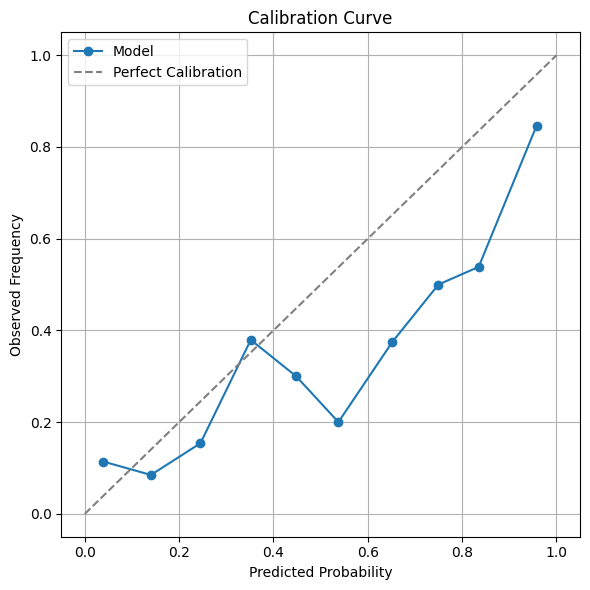

In [81]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute calibration curve values
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Post-model analysis**

## 1.SHAP Analysis


Use SHAP to interpret how much each feature contributes to the model’s predictions and to improve transparency and explainability for business stakeholders.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:11:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


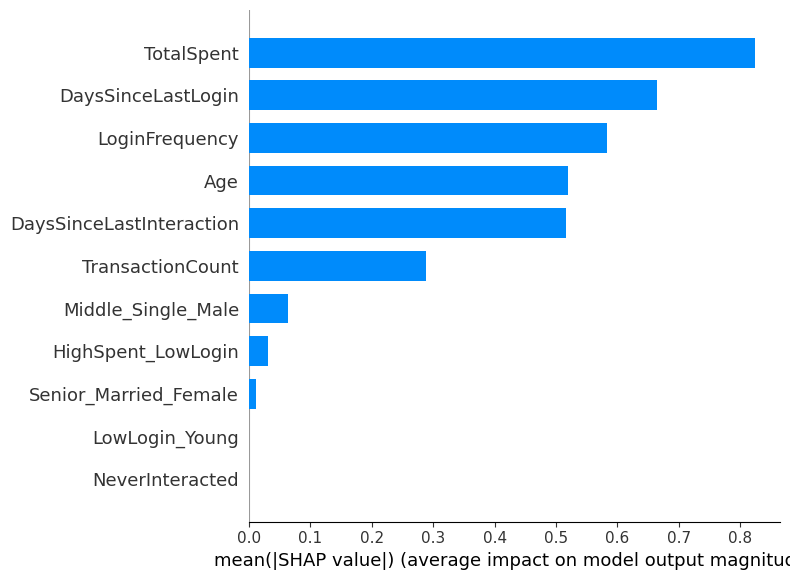

In [83]:
import shap

model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Display feature importance (average impact)
shap.summary_plot(shap_values, X, plot_type="bar")

## 2.Error analysis

In [85]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Get predicted labels and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Add results back to original test set
test_results = X_test.copy()
test_results['TrueLabel'] = y_test.values
test_results['PredictedLabel'] = y_pred
test_results['PredictedProb'] = y_proba

# Identify false negatives and false positives
false_negatives = test_results[(test_results['TrueLabel'] == 1) & (test_results['PredictedLabel'] == 0)]
false_positives = test_results[(test_results['TrueLabel'] == 0) & (test_results['PredictedLabel'] == 1)]

print(f"False Negatives (missed churners): {len(false_negatives)}")
print(f"False Positives (false alarms): {len(false_positives)}")

# Show sample of FN and FP
print("\nSample False Negatives:")
print(false_negatives.head(5))

print("\nSample False Positives:")
print(false_positives.head(5))


False Negatives (missed churners): 56
False Positives (false alarms): 16

Sample False Negatives:
       Age  TotalSpent  TransactionCount  LoginFrequency  DaysSinceLastLogin  \
168   60.0     2825.52               9.0            17.0               200.0   
718   27.0     2008.12               9.0            12.0                52.0   
590   31.0     1302.43               5.0            14.0                28.0   
1     65.0     1547.42               7.0             5.0                26.0   
1235  54.0     1930.41               5.0            38.0               345.0   

      DaysSinceLastInteraction  NeverInteracted  Middle_Single_Male  \
168                      639.0              0.0                 0.0   
718                      476.0              0.0                 0.0   
590                      546.5              0.0                 0.0   
1                        654.0              0.0                 0.0   
1235                     546.5              0.0                 0.

## 3.Business Analysis

In [86]:
# Business assumptions
avg_customer_value = 300  # Average yearly revenue per customer
num_churned = y_test.sum()  # Actual churners in test set
recall = recall_score(y_test, y_pred)

# Estimate how many customers we successfully retained
saved_customers = int(recall * num_churned)

# Estimated revenue retained
retained_revenue = saved_customers * avg_customer_value

print(f"Estimated saved customers: {saved_customers}")
print(f"Estimated retained revenue: ${retained_revenue}")


Estimated saved customers: 24
Estimated retained revenue: $7200


# **Pipeline Integration**

This step calculates the predicted probability of churn for each customer using the trained model.
Based on the probability scores, customers are segmented into three risk levels:

Low Risk (0–0.3)

Medium Risk (0.3–0.6)

High Risk (0.6–1.0)

This classification enables targeted intervention strategies, allowing the business to focus resources on high-risk customers.

In [77]:
# Predict the churn probability for each customer using the trained model
master['ChurnProbability'] = model.predict_proba(X)[:, 1]

# Categorize customers into risk levels based on predicted churn probability
master['RiskLevel'] = pd.cut(master['ChurnProbability'],
                             bins=[0, 0.3, 0.6, 1],
                             labels=['Low Risk', 'Medium Risk', 'High Risk'])

# Preview the churn probability and risk level for the first few customers
master[['CustomerID', 'ChurnProbability', 'RiskLevel']].head()



,CustomerID,ChurnProbability,RiskLevel
0,1,0.003438,Low Risk
1,2,0.015512,Low Risk
2,3,0.954045,High Risk
3,4,0.018368,Low Risk
4,4,0.032551,Low Risk


In [80]:
# Select relevant columns for output: customer ID, predicted churn probability, and assigned risk level
output = master[['CustomerID', 'ChurnProbability', 'RiskLevel']]

# Export the output to an Excel file for further use (e.g., CRM system, retention team, or reporting)
output.to_excel("Churn_Risk_Customers.xlsx", index=False)


In this virtual project, the model has been integrated into a simplified pipeline that mimics real-world deployment:

- **Automated churn probability scoring** is applied to the full customer dataset using the trained model.
- **Risk segmentation** is implemented by classifying customers into Low, Medium, and High risk groups based on predicted probabilities.
- **Output generation** is performed by exporting customer scores and risk levels to an Excel file, ready for downstream use such as CRM integration or targeted marketing.

Although this notebook does not include real-time streaming or API-based deployment, the modular structure and logic of this pipeline demonstrate readiness for production adaptation.